In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
from pathlib import Path

DATA_DIR = Path("/content/drive/MyDrive/CSE511-ML-Project-Kaggle-dataset")

train = pd.read_csv(DATA_DIR / "train.csv")
test = pd.read_csv(DATA_DIR / "test.csv")
sample_sub = pd.read_csv(DATA_DIR / "sample_submission.csv")

print("Train shape:", train.shape)
print("Test shape:", test.shape)
print("Sample submission shape:", sample_sub.shape)
print("\nTrain columns:", train.columns.tolist())

Train shape: (15533, 18)
Test shape: (5225, 17)
Sample submission shape: (13840, 2)

Train columns: ['id', 'Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'WeightCategory']


# 1. Quick Dataset Summary

In [3]:
train.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,15533.000000,15533.000000,15533.000000,15533.000000,15533.000000,15533.000000,15533.000000,15533.000000,15533.000000
mean,7766.000000,23.816308,1.699918,87.785225,2.442917,2.760425,2.027626,0.976968,0.613813
std,4484.135201,5.663167,0.087670,26.369144,0.530895,0.706463,0.607733,0.836841,0.602223
min,0.000000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,3883.000000,20.000000,1.630927,66.000000,2.000000,3.000000,1.796257,0.007050,0.000000
50%,7766.000000,22.771612,1.700000,84.000000,2.342220,3.000000,2.000000,1.000000,0.566353
75%,11649.000000,26.000000,1.762921,111.600553,3.000000,3.000000,2.531456,1.582675,1.000000
max,15532.000000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


In [4]:
test.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,5225.000000,5225.000000,5225.000000,5225.000000,5225.000000,5225.00000,5225.000000,5225.000000,5225.000000
mean,18145.000000,23.917600,1.701216,88.192612,2.454802,2.76403,2.034746,0.995953,0.625505
std,1508.471909,5.761355,0.086240,26.410210,0.540020,0.70219,0.610672,0.842551,0.601761
min,15533.000000,14.000000,1.463167,39.101805,1.000000,1.00000,1.000000,0.000000,0.000000
25%,16839.000000,20.000000,1.632983,66.500000,2.000000,3.00000,1.785804,0.015860,0.000000
50%,18145.000000,22.875223,1.700000,85.000000,2.499388,3.00000,2.000000,1.000000,0.582840
75%,19451.000000,26.000000,1.761519,111.720238,3.000000,3.00000,2.559750,1.624981,1.000000
max,20757.000000,55.246250,1.947406,165.057269,3.000000,4.00000,3.000000,3.000000,2.000000


In [5]:
print(train.shape)
print(test.shape)

(15533, 18)
(5225, 17)


DATA TYPE ANALYSIS - TRAINING DATA

1. DATA TYPES FOR EACH COLUMN
                        Column Data Type  Non-Null Count  Null Count
                            id     int64           15533           0
                        Gender    object           15533           0
                           Age   float64           15533           0
                        Height   float64           15533           0
                        Weight   float64           15533           0
family_history_with_overweight    object           15533           0
                          FAVC    object           15533           0
                          FCVC   float64           15533           0
                           NCP   float64           15533           0
                          CAEC    object           15533           0
                         SMOKE    object           15533           0
                          CH2O   float64           15533           0
                           SCC    obj

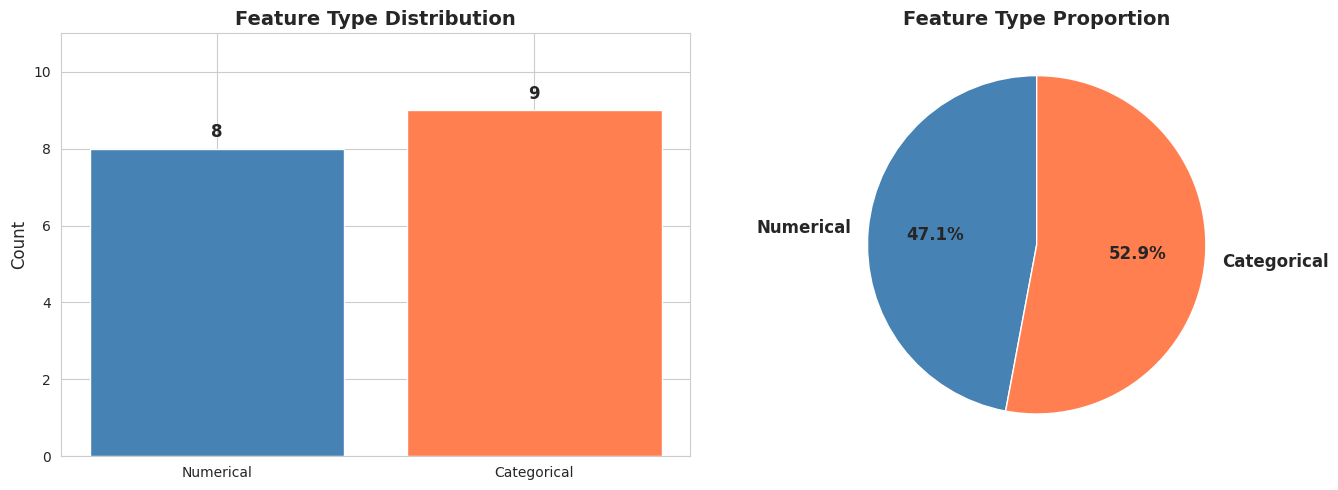

Visualization saved: data_type_distribution.png

5. ADDITIONAL DATA TYPE INSIGHTS

Potential Issues:
No numerical columns with suspiciously few unique values
No high-cardinality categorical columns

6. EXPORTING SUMMARY TABLE
                            Column Data Type Type Category  Non-Null Count  \
0                               id     int64   Categorical           15533   
1                           Gender    object   Categorical           15533   
2                              Age   float64     Numerical           15533   
3                           Height   float64     Numerical           15533   
4                           Weight   float64     Numerical           15533   
5   family_history_with_overweight    object   Categorical           15533   
6                             FAVC    object   Categorical           15533   
7                             FCVC   float64     Numerical           15533   
8                              NCP   float64     Numerical           155

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("="*80)
print("DATA TYPE ANALYSIS - TRAINING DATA")
print("="*80)

print("\n" + "="*80)
print("1. DATA TYPES FOR EACH COLUMN")
print("="*80)

dtypes_df = pd.DataFrame({
    'Column': train.columns,
    'Data Type': train.dtypes.values,
    'Non-Null Count': train.count().values,
    'Null Count': train.isnull().sum().values
})

print(dtypes_df.to_string(index=False))

print("\n" + "="*80)
print("2. NUMERICAL vs CATEGORICAL FEATURES")
print("="*80)

numerical_cols = train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = train.select_dtypes(include=['object', 'category']).columns.tolist()

if 'id' in numerical_cols:
    numerical_cols.remove('id')
    print("Note: 'id' column excluded from numerical features")

target_column = 'Weight Category'
if target_column in categorical_cols:
    categorical_cols_features = [col for col in categorical_cols if col != target_column]
else:
    categorical_cols_features = categorical_cols

print("\nNUMERICAL FEATURES:")
print(f"  Count: {len(numerical_cols)}")
print(f"  Columns: {numerical_cols}")

print("\nCATEGORICAL FEATURES:")
print(f"  Count: {len(categorical_cols_features)}")
print(f"  Columns: {categorical_cols_features}")

if target_column in train.columns:
    print(f"\nTARGET VARIABLE: {target_column}")
    print(f"  Type: {train[target_column].dtype}")

print("\n" + "-"*80)
print("DETAILED BREAKDOWN:")
print("-"*80)

numerical_details = []
for col in numerical_cols:
    numerical_details.append({
        'Column': col,
        'Type': 'Numerical',
        'Data Type': str(train[col].dtype),
        'Unique Values': train[col].nunique(),
        'Min': train[col].min(),
        'Max': train[col].max(),
        'Mean': train[col].mean()
    })

categorical_details = []
for col in categorical_cols:
    categorical_details.append({
        'Column': col,
        'Type': 'Categorical',
        'Data Type': str(train[col].dtype),
        'Unique Values': train[col].nunique(),
        'Most Frequent': train[col].mode()[0] if len(train[col].mode()) > 0 else 'N/A',
        'Frequency': train[col].value_counts().iloc[0] if len(train[col]) > 0 else 0
    })

numerical_summary = pd.DataFrame(numerical_details)
categorical_summary = pd.DataFrame(categorical_details)

print("\nNumerical Features Summary:")
print(numerical_summary.to_string(index=False))

print("\n\nCategorical Features Summary:")
print(categorical_summary.to_string(index=False))

print("\n" + "="*80)
print("3. TOTAL DATA TYPES SUMMARY")
print("="*80)

dtype_counts = train.dtypes.value_counts()
print("\nData Type Distribution:")
print(dtype_counts)

print("\n" + "-"*80)
print("OVERALL SUMMARY:")
print("-"*80)
print(f"Total Columns: {len(train.columns)}")
print(f"Total Numerical Features: {len(numerical_cols)}")
print(f"Total Categorical Features: {len(categorical_cols_features)}")
print(f"Target Variable: 1 ({target_column})")
print(f"ID Column: {'Yes (excluded from features)' if 'id' in train.columns else 'No'}")

total_features = len(numerical_cols) + len(categorical_cols_features)
if total_features > 0:
    print(f"\nFeature Composition:")
    print(f"  Numerical: {len(numerical_cols)/total_features*100:.1f}%")
    print(f"  Categorical: {len(categorical_cols_features)/total_features*100:.1f}%")

print("\n" + "="*80)
print("4. VISUALIZATIONS")
print("="*80)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

feature_types = {
    'Numerical': len(numerical_cols),
    'Categorical': len(categorical_cols_features)
}

axes[0].bar(feature_types.keys(), feature_types.values(), color=['steelblue', 'coral'])
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_title('Feature Type Distribution', fontsize=14, fontweight='bold')
axes[0].set_ylim(0, max(feature_types.values()) + 2)

for i, (key, value) in enumerate(feature_types.items()):
    axes[0].text(i, value + 0.3, str(value), ha='center', fontsize=12, fontweight='bold')

axes[1].pie(feature_types.values(), labels=feature_types.keys(),
            autopct='%1.1f%%', colors=['steelblue', 'coral'],
            startangle=90, textprops={'fontsize': 12, 'fontweight': 'bold'})
axes[1].set_title('Feature Type Proportion', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('data_type_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("Visualization saved: data_type_distribution.png")

print("\n" + "="*80)
print("5. ADDITIONAL DATA TYPE INSIGHTS")
print("="*80)

print("\nPotential Issues:")

potential_categorical = []
for col in numerical_cols:
    unique_ratio = train[col].nunique() / len(train)
    if unique_ratio < 0.05 and train[col].nunique() < 10:
        potential_categorical.append({
            'Column': col,
            'Unique Values': train[col].nunique(),
            'Unique Ratio': f"{unique_ratio*100:.2f}%"
        })

if potential_categorical:
    print("\nNumerical columns with few unique values (might be categorical):")
    print(pd.DataFrame(potential_categorical).to_string(index=False))
else:
    print("No numerical columns with suspiciously few unique values")

high_cardinality = []
for col in categorical_cols:
    unique_ratio = train[col].nunique() / len(train)
    if unique_ratio > 0.5:
        high_cardinality.append({
            'Column': col,
            'Unique Values': train[col].nunique(),
            'Unique Ratio': f"{unique_ratio*100:.2f}%"
        })

if high_cardinality:
    print("\nCategorical columns with high cardinality:")
    print(pd.DataFrame(high_cardinality).to_string(index=False))
else:
    print("No high-cardinality categorical columns")

print("\n" + "="*80)
print("6. EXPORTING SUMMARY TABLE")
print("="*80)

summary_table = pd.DataFrame({
    'Column': train.columns,
    'Data Type': train.dtypes.values,
    'Type Category': ['Numerical' if col in numerical_cols else 'Categorical'
                      for col in train.columns],
    'Non-Null Count': train.count().values,
    '% Missing': (train.isnull().sum() / len(train) * 100).values,
    'Unique Values': train.nunique().values,
    'Example Values': [', '.join(map(str, train[col].dropna().unique()[:3]))
                       for col in train.columns]
})

print(summary_table)

# 4. EDA

## 4.1 Target Distribution and Class Imbalance Analysis

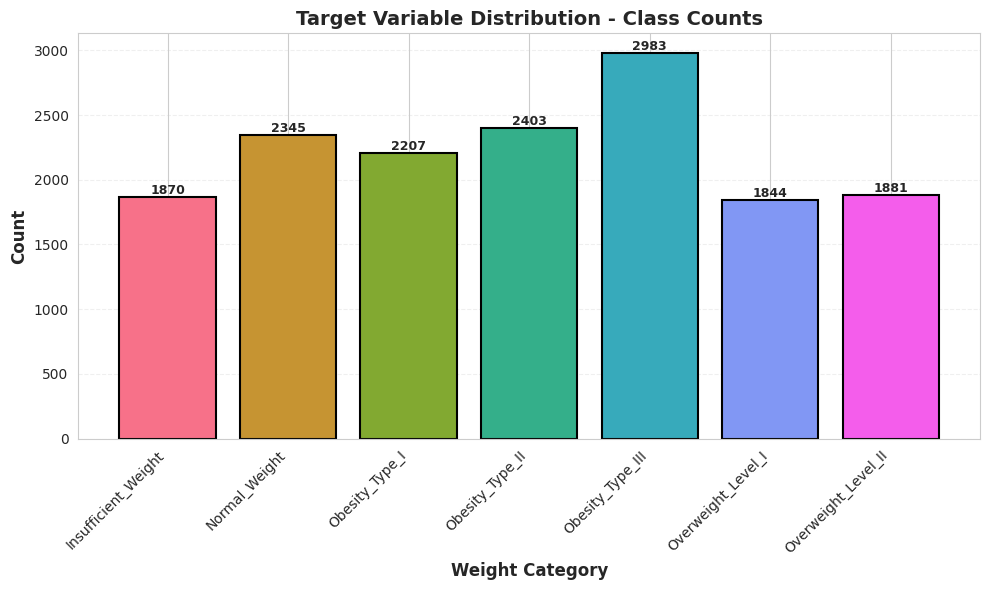

Saved: target_barplot.png


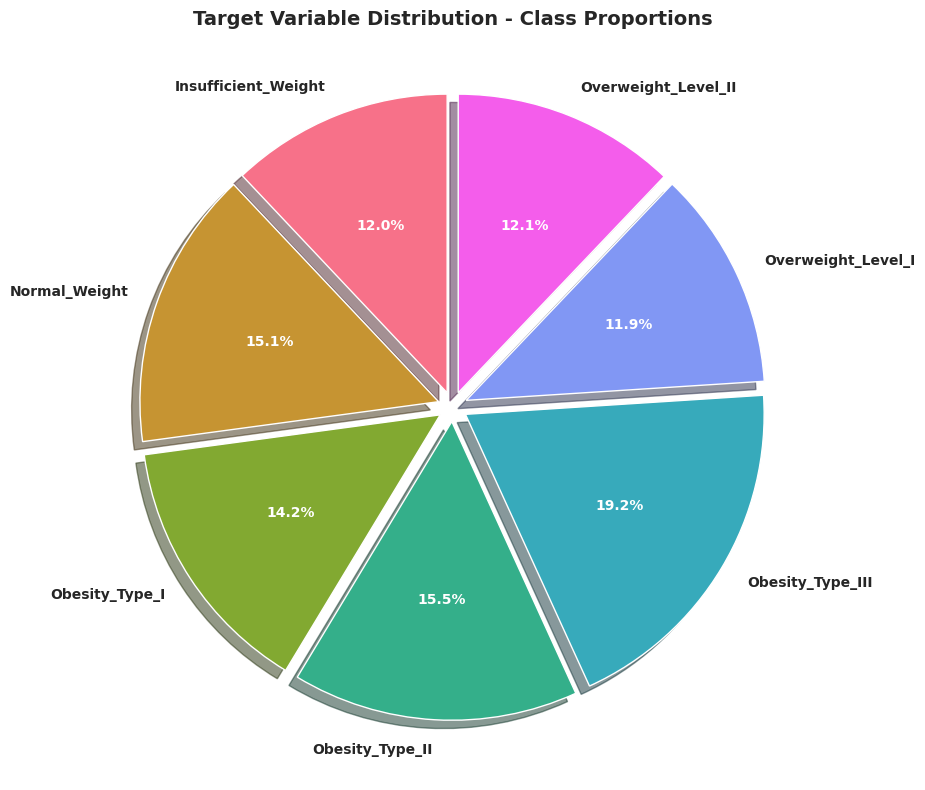

Saved: target_piechart.png


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

target_counts = train['WeightCategory'].value_counts().sort_index()
colors = sns.color_palette("husl", len(target_counts))

plt.figure(figsize=(10, 6))
bars = plt.bar(range(len(target_counts)), target_counts.values,
               color=colors, edgecolor='black', linewidth=1.5)
plt.xlabel('Weight Category', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.title('Target Variable Distribution - Class Counts', fontsize=14, fontweight='bold')
plt.xticks(range(len(target_counts)), target_counts.index, rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3, linestyle='--')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}', ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.savefig('target_barplot.png', dpi=300, bbox_inches='tight')
plt.show()
print("Saved: target_barplot.png")

plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(target_counts.values,
                                    labels=target_counts.index,
                                    colors=colors,
                                    autopct='%1.1f%%',
                                    startangle=90,
                                    explode=[0.05]*len(target_counts),
                                    shadow=True,
                                    textprops={'fontsize': 10, 'fontweight': 'bold'})
plt.title('Target Variable Distribution - Class Proportions', fontsize=14, fontweight='bold')

for autotext in autotexts:
    autotext.set_color('white')

plt.tight_layout()
plt.savefig('target_piechart.png', dpi=300, bbox_inches='tight')
plt.show()
print("Saved: target_piechart.png")

## Class Imbalance Assesment

In [27]:
import pandas as pd

print("="*80)
print("CLASS BALANCE ASSESSMENT")
print("="*80)

target_counts = train['WeightCategory'].value_counts().sort_index()
target_percentages = (train['WeightCategory'].value_counts() / len(train) * 100).sort_index()

print("\nClass Distribution:")
for class_name, count, pct in zip(target_counts.index, target_counts.values, target_percentages.values):
    print(f"  {class_name}: {count} ({pct:.2f}%)")

most_frequent_class = target_counts.idxmax()
most_frequent_count = target_counts.max()
most_frequent_pct = (most_frequent_count / len(train)) * 100

least_frequent_class = target_counts.idxmin()
least_frequent_count = target_counts.min()
least_frequent_pct = (least_frequent_count / len(train)) * 100

imbalance_ratio = most_frequent_count / least_frequent_count

if imbalance_ratio < 1.5:
    balance_status = "Balanced"
    handling_needed = "does not necessitate"
elif imbalance_ratio < 3:
    balance_status = "Moderately imbalanced"
    handling_needed = "may benefit from"
else:
    balance_status = "Highly imbalanced"
    handling_needed = "necessitates"

print("\n" + "="*80)
print("ADDITIONAL BALANCE METRICS")
print("="*80)

std_counts = target_counts.std()
mean_counts = target_counts.mean()
cv = (std_counts / mean_counts) * 100

print(f"\nMean class size: {mean_counts:.1f}")
print(f"Standard deviation: {std_counts:.1f}")
print(f"Coefficient of variation: {cv:.2f}%")

print(f"\nRange: {least_frequent_count} to {most_frequent_count} samples")
print(f"Difference: {most_frequent_count - least_frequent_count} samples")

CLASS BALANCE ASSESSMENT

Class Distribution:
  Insufficient_Weight: 1870 (12.04%)
  Normal_Weight: 2345 (15.10%)
  Obesity_Type_I: 2207 (14.21%)
  Obesity_Type_II: 2403 (15.47%)
  Obesity_Type_III: 2983 (19.20%)
  Overweight_Level_I: 1844 (11.87%)
  Overweight_Level_II: 1881 (12.11%)

ADDITIONAL BALANCE METRICS

Mean class size: 2219.0
Standard deviation: 410.3
Coefficient of variation: 18.49%

Range: 1844 to 2983 samples
Difference: 1139 samples


## 4.2 Univariate Analysis

## 4.2.1 Numerical Features

UNIVARIATE ANALYSIS - NUMERICAL FEATURES

Creating combined visualizations...


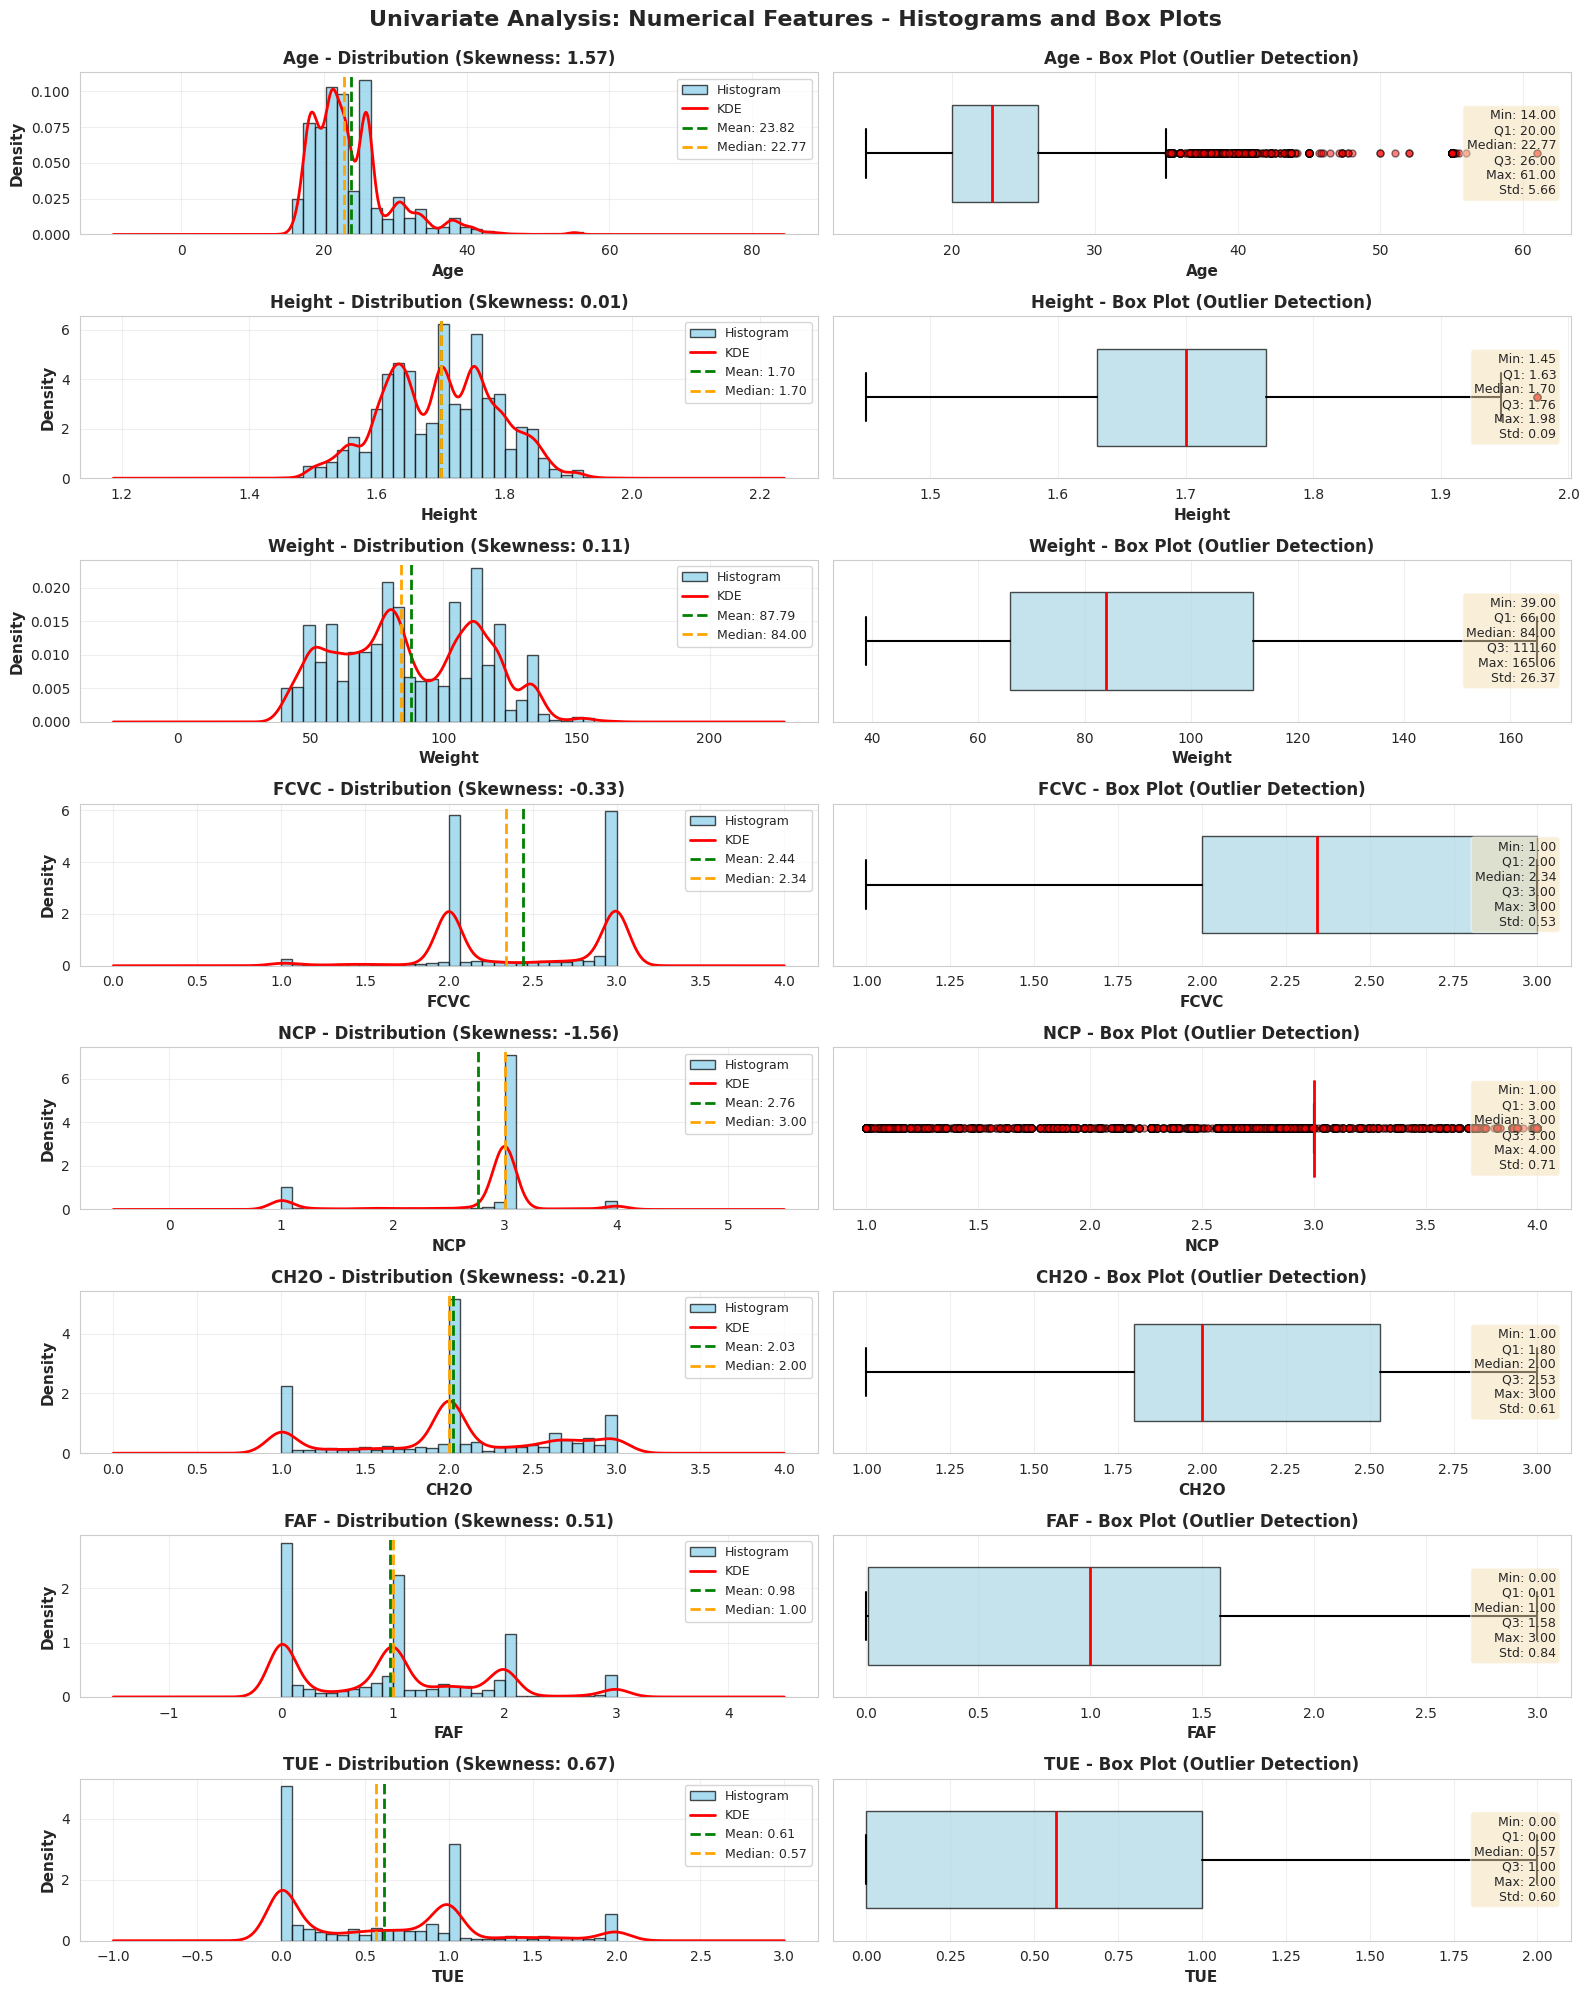

Saved: univariate_numerical_combined.png

Creating separate histogram visualization...


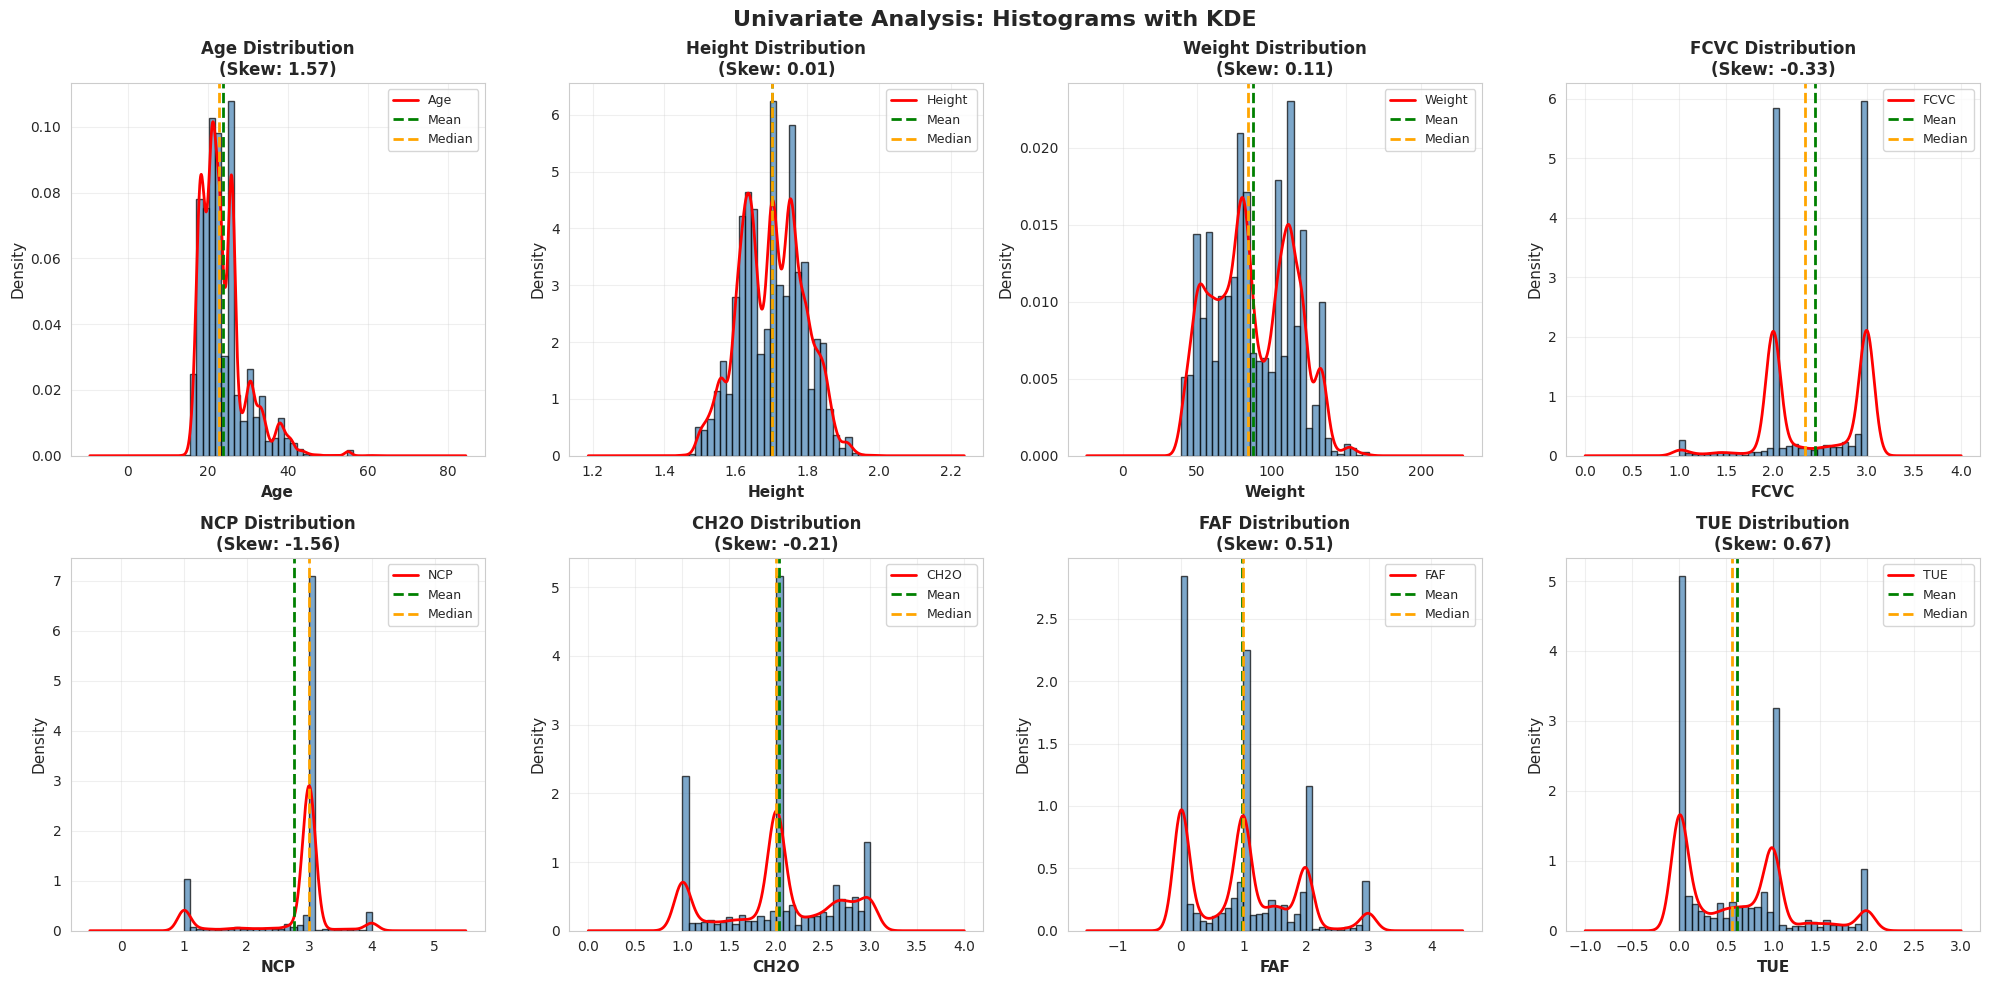

Saved: univariate_histograms.png

Creating separate box plot visualization...


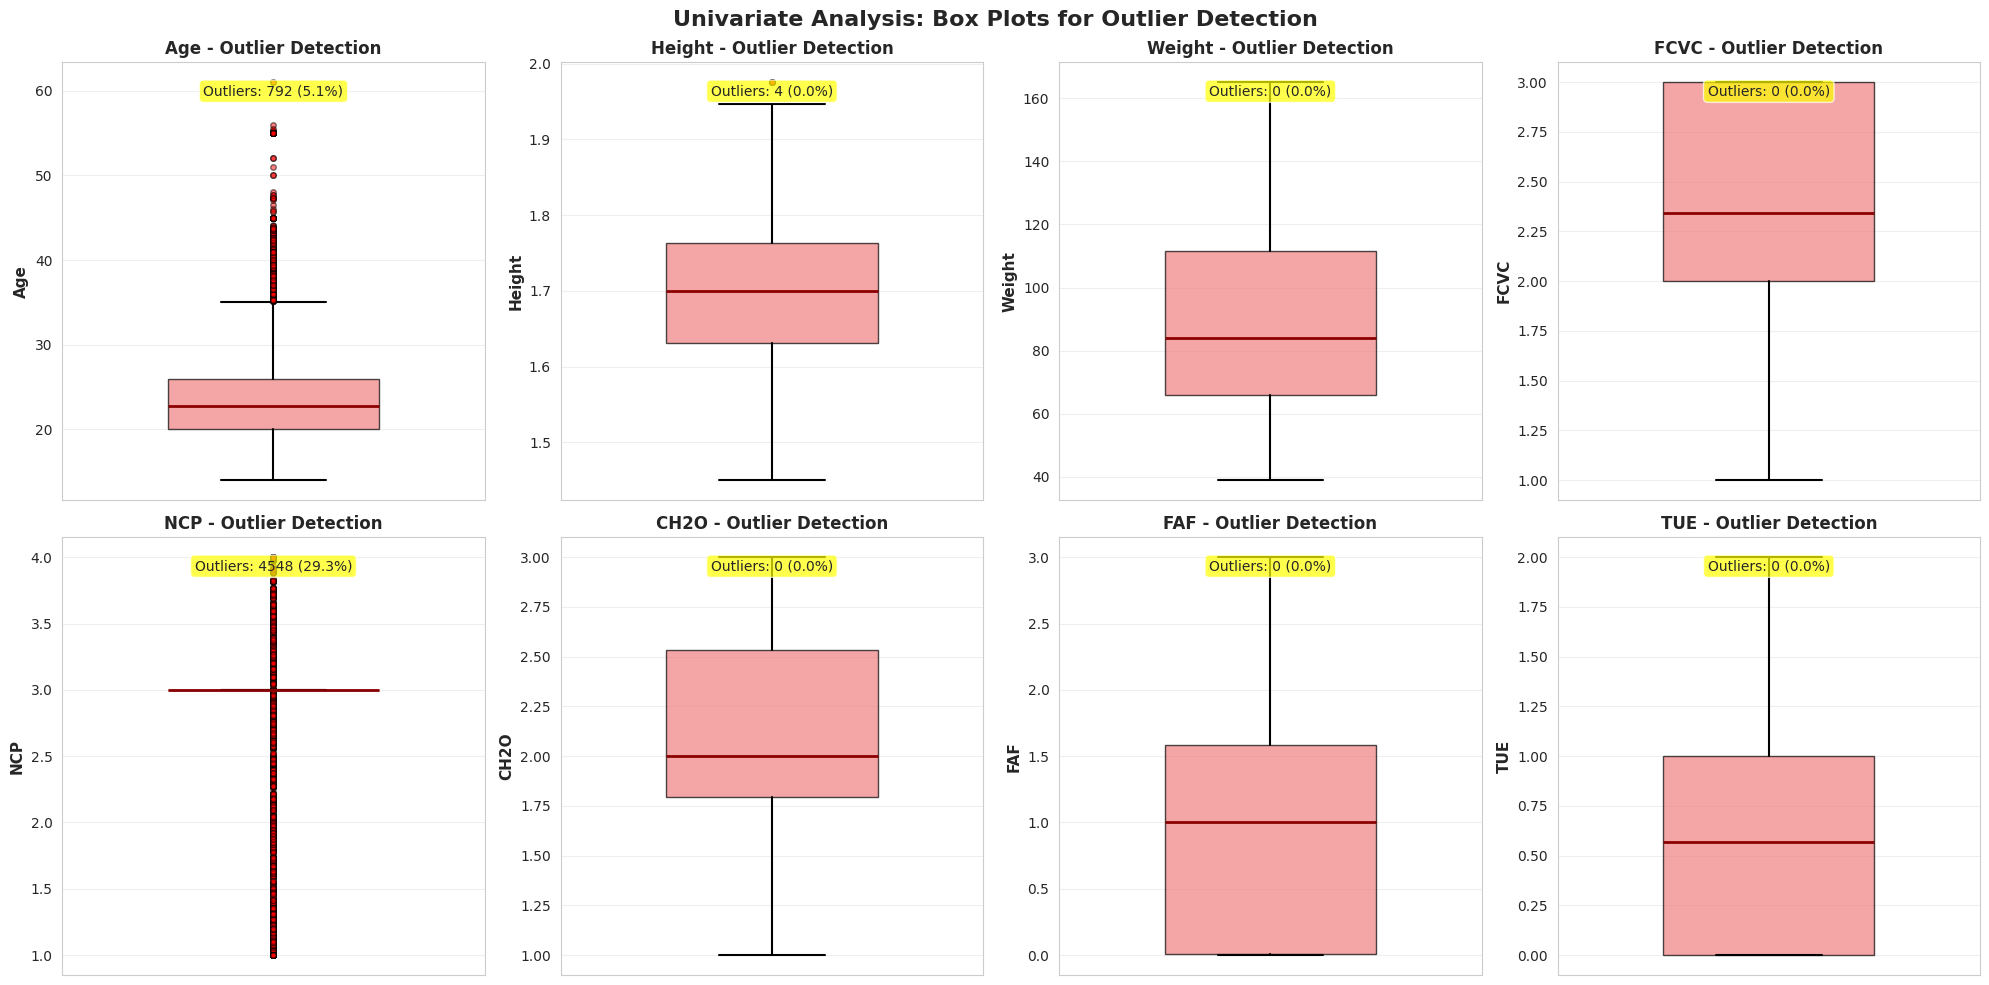

Saved: univariate_boxplots.png

DESCRIPTIVE STATISTICS SUMMARY

 Feature  Count      Mean       Std   Min        Q1    Median         Q3        Max  Skewness  Kurtosis
    Age  15533 23.816308  5.663167 14.00 20.000000 22.771612  26.000000  61.000000  1.571976  3.596311
 Height  15533  1.699918  0.087670  1.45  1.630927  1.700000   1.762921   1.975663  0.010001 -0.561835
 Weight  15533 87.785225 26.369144 39.00 66.000000 84.000000 111.600553 165.057269  0.108552 -0.986579
   FCVC  15533  2.442917  0.530895  1.00  2.000000  2.342220   3.000000   3.000000 -0.332043 -0.916463
    NCP  15533  2.760425  0.706463  1.00  3.000000  3.000000   3.000000   4.000000 -1.561264  1.825176
   CH2O  15533  2.027626  0.607733  1.00  1.796257  2.000000   2.531456   3.000000 -0.209277 -0.736703
    FAF  15533  0.976968  0.836841  0.00  0.007050  1.000000   1.582675   3.000000  0.514529 -0.474434
    TUE  15533  0.613813  0.602223  0.00  0.000000  0.566353   1.000000   2.000000  0.674430 -0.415027

Statist

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

print("="*80)
print("UNIVARIATE ANALYSIS - NUMERICAL FEATURES")
print("="*80)

numerical_features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

print("\nCreating combined visualizations...")

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (20, 12)

fig, axes = plt.subplots(len(numerical_features), 2, figsize=(16, 20))

for idx, feature in enumerate(numerical_features):
    data = train[feature].dropna()

    mean_val = data.mean()
    median_val = data.median()
    std_val = data.std()
    skew_val = data.skew()

    ax_hist = axes[idx, 0]

    ax_hist.hist(data, bins=30, color='skyblue', edgecolor='black',
                 alpha=0.7, density=True, label='Histogram')

    data.plot(kind='kde', ax=ax_hist, color='red', linewidth=2, label='KDE')

    ax_hist.axvline(mean_val, color='green', linestyle='--',
                   linewidth=2, label=f'Mean: {mean_val:.2f}')
    ax_hist.axvline(median_val, color='orange', linestyle='--',
                   linewidth=2, label=f'Median: {median_val:.2f}')

    ax_hist.set_xlabel(feature, fontsize=11, fontweight='bold')
    ax_hist.set_ylabel('Density', fontsize=11, fontweight='bold')
    ax_hist.set_title(f'{feature} - Distribution (Skewness: {skew_val:.2f})',
                     fontsize=12, fontweight='bold')
    ax_hist.legend(loc='best', fontsize=9)
    ax_hist.grid(alpha=0.3)

    ax_box = axes[idx, 1]

    bp = ax_box.boxplot([data], vert=False, patch_artist=True,
                        widths=0.6,
                        boxprops=dict(facecolor='lightblue', alpha=0.7),
                        medianprops=dict(color='red', linewidth=2),
                        whiskerprops=dict(color='black', linewidth=1.5),
                        capprops=dict(color='black', linewidth=1.5),
                        flierprops=dict(marker='o', markerfacecolor='red',
                                       markersize=5, alpha=0.5))

    ax_box.set_xlabel(feature, fontsize=11, fontweight='bold')
    ax_box.set_title(f'{feature} - Box Plot (Outlier Detection)',
                    fontsize=12, fontweight='bold')
    ax_box.set_yticks([])
    ax_box.grid(alpha=0.3, axis='x')

    stats_text = f'Min: {data.min():.2f}\nQ1: {data.quantile(0.25):.2f}\n'
    stats_text += f'Median: {median_val:.2f}\nQ3: {data.quantile(0.75):.2f}\n'
    stats_text += f'Max: {data.max():.2f}\nStd: {std_val:.2f}'

    ax_box.text(0.98, 0.5, stats_text, transform=ax_box.transAxes,
               fontsize=9, verticalalignment='center', horizontalalignment='right',
               bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.suptitle('Univariate Analysis: Numerical Features - Histograms and Box Plots',
            fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.savefig('univariate_numerical_combined.png', dpi=300, bbox_inches='tight')
plt.show()

print("Saved: univariate_numerical_combined.png")

print("\nCreating separate histogram visualization...")

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for idx, feature in enumerate(numerical_features):
    data = train[feature].dropna()
    mean_val = data.mean()
    median_val = data.median()
    skew_val = data.skew()

    axes[idx].hist(data, bins=30, color='steelblue', edgecolor='black',
                   alpha=0.7, density=True)
    data.plot(kind='kde', ax=axes[idx], color='red', linewidth=2)

    axes[idx].axvline(mean_val, color='green', linestyle='--',
                     linewidth=2, label=f'Mean')
    axes[idx].axvline(median_val, color='orange', linestyle='--',
                     linewidth=2, label=f'Median')

    axes[idx].set_xlabel(feature, fontsize=11, fontweight='bold')
    axes[idx].set_ylabel('Density', fontsize=11)
    axes[idx].set_title(f'{feature} Distribution\n(Skew: {skew_val:.2f})',
                       fontsize=12, fontweight='bold')
    axes[idx].legend(fontsize=9)
    axes[idx].grid(alpha=0.3)

plt.suptitle('Univariate Analysis: Histograms with KDE',
            fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('univariate_histograms.png', dpi=300, bbox_inches='tight')
plt.show()

print("Saved: univariate_histograms.png")

print("\nCreating separate box plot visualization...")

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for idx, feature in enumerate(numerical_features):
    data = train[feature].dropna()

    bp = axes[idx].boxplot([data], vert=True, patch_artist=True,
                           widths=0.5,
                           boxprops=dict(facecolor='lightcoral', alpha=0.7),
                           medianprops=dict(color='darkred', linewidth=2),
                           whiskerprops=dict(color='black', linewidth=1.5),
                           capprops=dict(color='black', linewidth=1.5),
                           flierprops=dict(marker='o', markerfacecolor='red',
                                          markersize=4, alpha=0.5))

    axes[idx].set_ylabel(feature, fontsize=11, fontweight='bold')
    axes[idx].set_title(f'{feature} - Outlier Detection',
                       fontsize=12, fontweight='bold')
    axes[idx].set_xticks([])
    axes[idx].grid(alpha=0.3, axis='y')

    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    outliers = data[(data < Q1 - 1.5*IQR) | (data > Q3 + 1.5*IQR)]

    axes[idx].text(0.5, 0.95, f'Outliers: {len(outliers)} ({len(outliers)/len(data)*100:.1f}%)',
                  transform=axes[idx].transAxes,
                  fontsize=10, verticalalignment='top', horizontalalignment='center',
                  bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))

plt.suptitle('Univariate Analysis: Box Plots for Outlier Detection',
            fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('univariate_boxplots.png', dpi=300, bbox_inches='tight')
plt.show()

print("Saved: univariate_boxplots.png")

print("\n" + "="*80)
print("DESCRIPTIVE STATISTICS SUMMARY")
print("="*80)

stats_summary = pd.DataFrame()
for feature in numerical_features:
    data = train[feature].dropna()

    stats = {
        'Feature': feature,
        'Count': len(data),
        'Mean': data.mean(),
        'Std': data.std(),
        'Min': data.min(),
        'Q1': data.quantile(0.25),
        'Median': data.median(),
        'Q3': data.quantile(0.75),
        'Max': data.max(),
        'Skewness': data.skew(),
        'Kurtosis': data.kurtosis()
    }
    stats_summary = pd.concat([stats_summary, pd.DataFrame([stats])], ignore_index=True)

print("\n", stats_summary.to_string(index=False))

stats_summary.to_csv('univariate_numerical_stats.csv', index=False)
print("\nStatistics saved: univariate_numerical_stats.csv")

## 4.2.2 Univariate Categorical

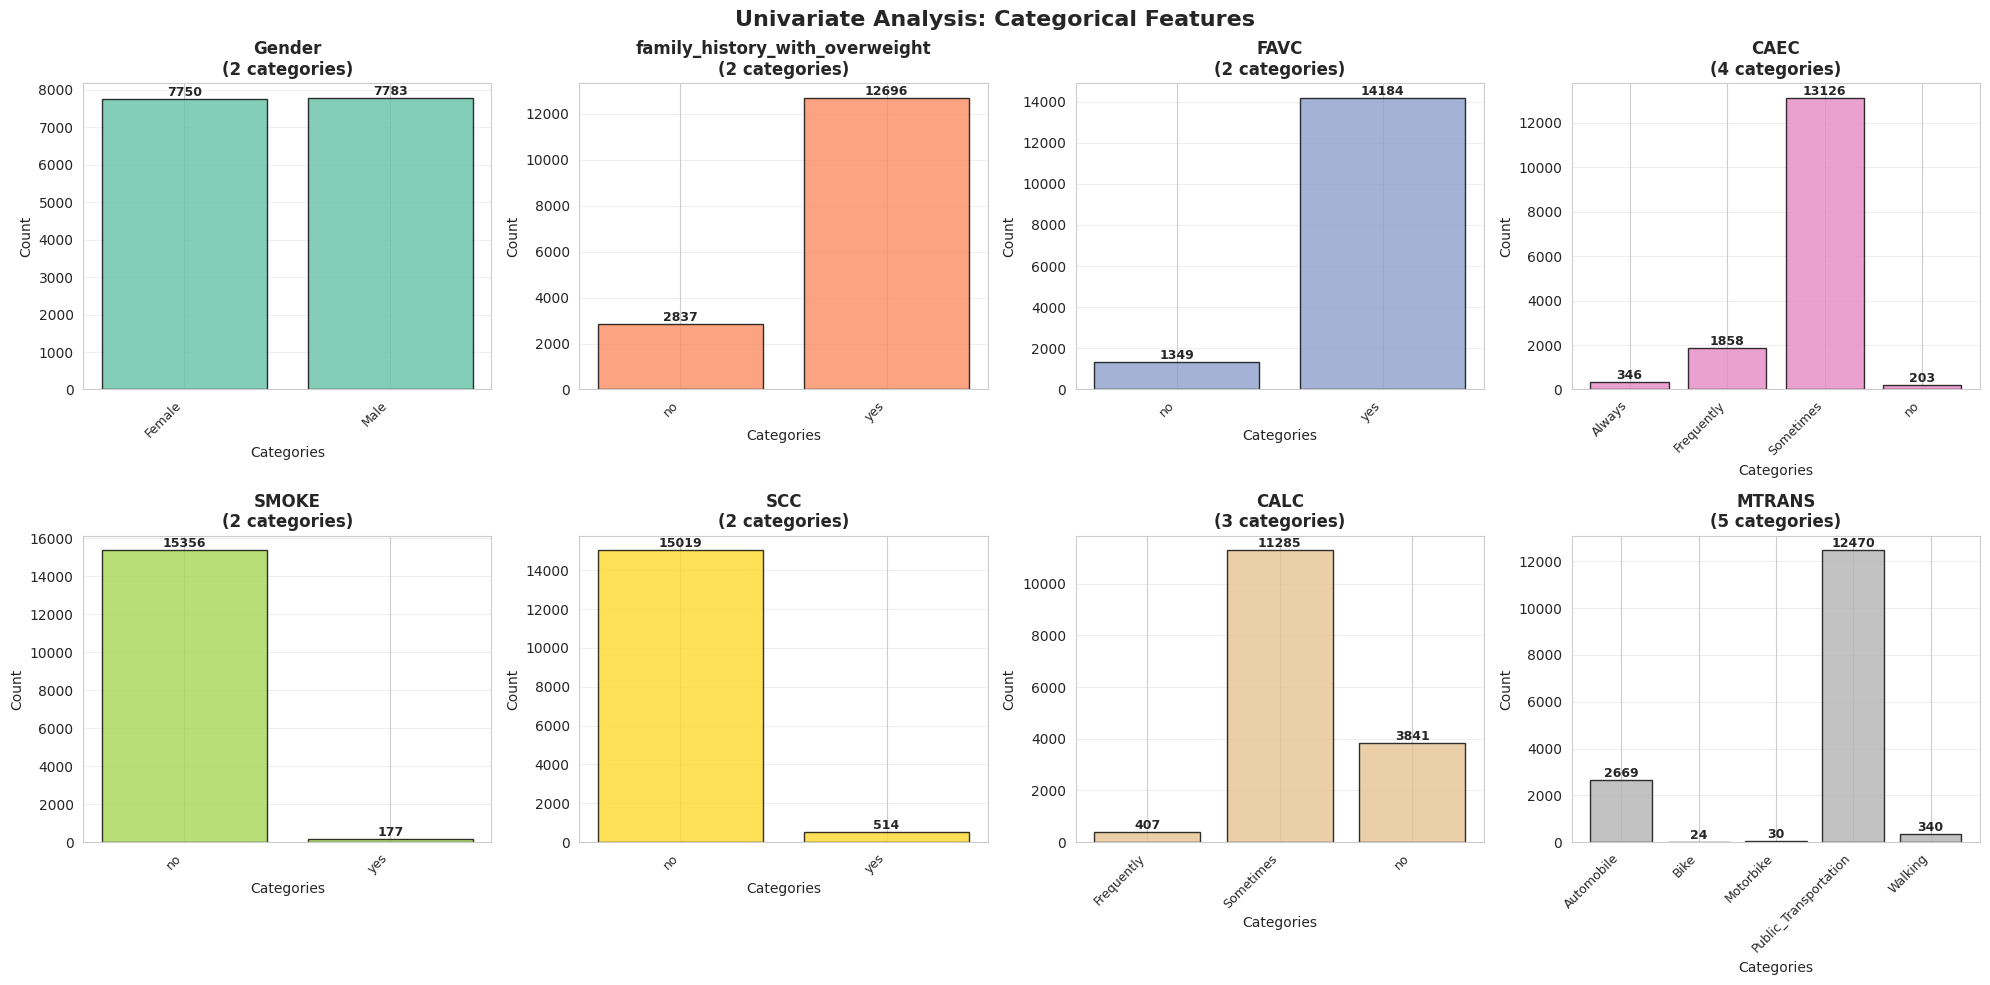

Saved: univariate_categorical.png


In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

categorical_features = ['Gender', 'family_history_with_overweight', 'FAVC',
                       'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for idx, feature in enumerate(categorical_features):
    counts = train[feature].value_counts().sort_index()
    axes[idx].bar(range(len(counts)), counts.values,
                  color=sns.color_palette("Set2")[idx],
                  edgecolor='black', alpha=0.8)

    axes[idx].set_title(f'{feature}\n({len(counts)} categories)', fontweight='bold')
    axes[idx].set_xlabel('Categories')
    axes[idx].set_ylabel('Count')
    axes[idx].set_xticks(range(len(counts)))
    axes[idx].set_xticklabels(counts.index, rotation=45, ha='right', fontsize=9)
    axes[idx].grid(axis='y', alpha=0.3)

    for i, (count) in enumerate(counts.values):
        axes[idx].text(i, count, f'{int(count)}',
                      ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.suptitle('Univariate Analysis: Categorical Features', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('univariate_categorical.png', dpi=300, bbox_inches='tight')
plt.show()

print("Saved: univariate_categorical.png")

Creating categorical feature count plots (2 per row)...


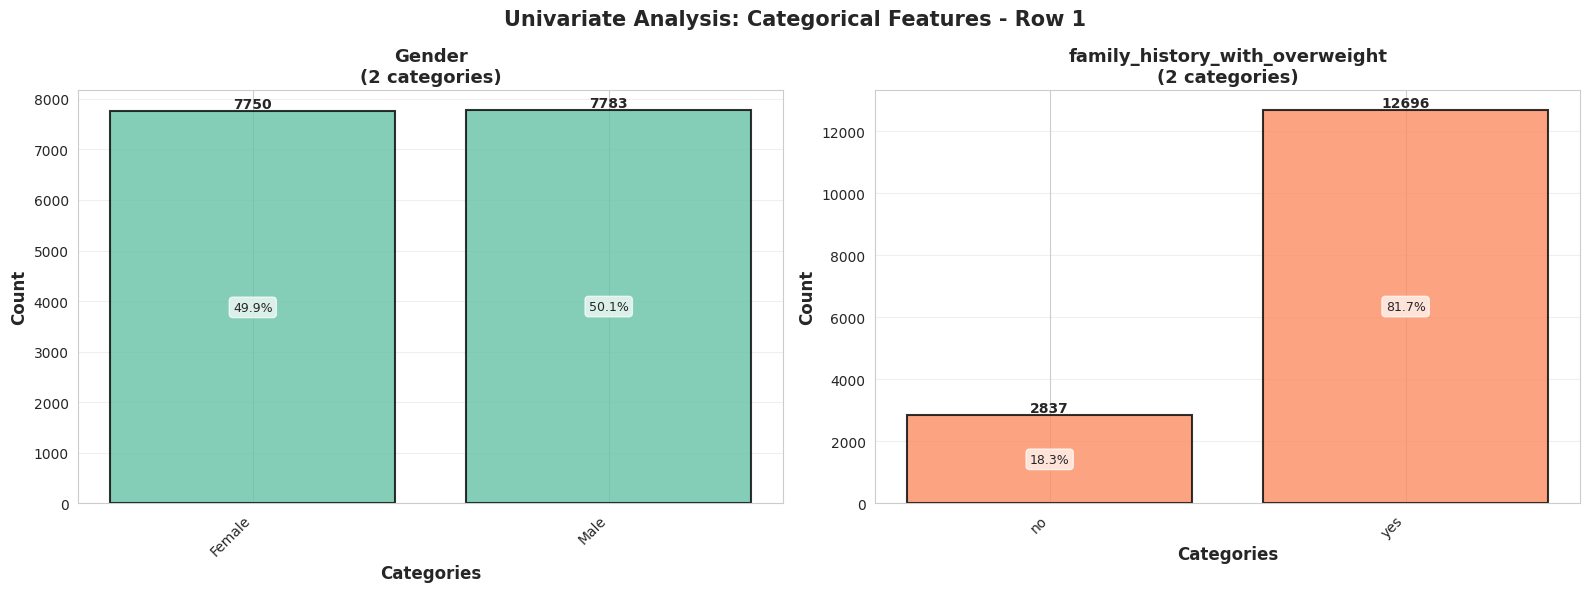

Saved: univariate_categorical_row1.png


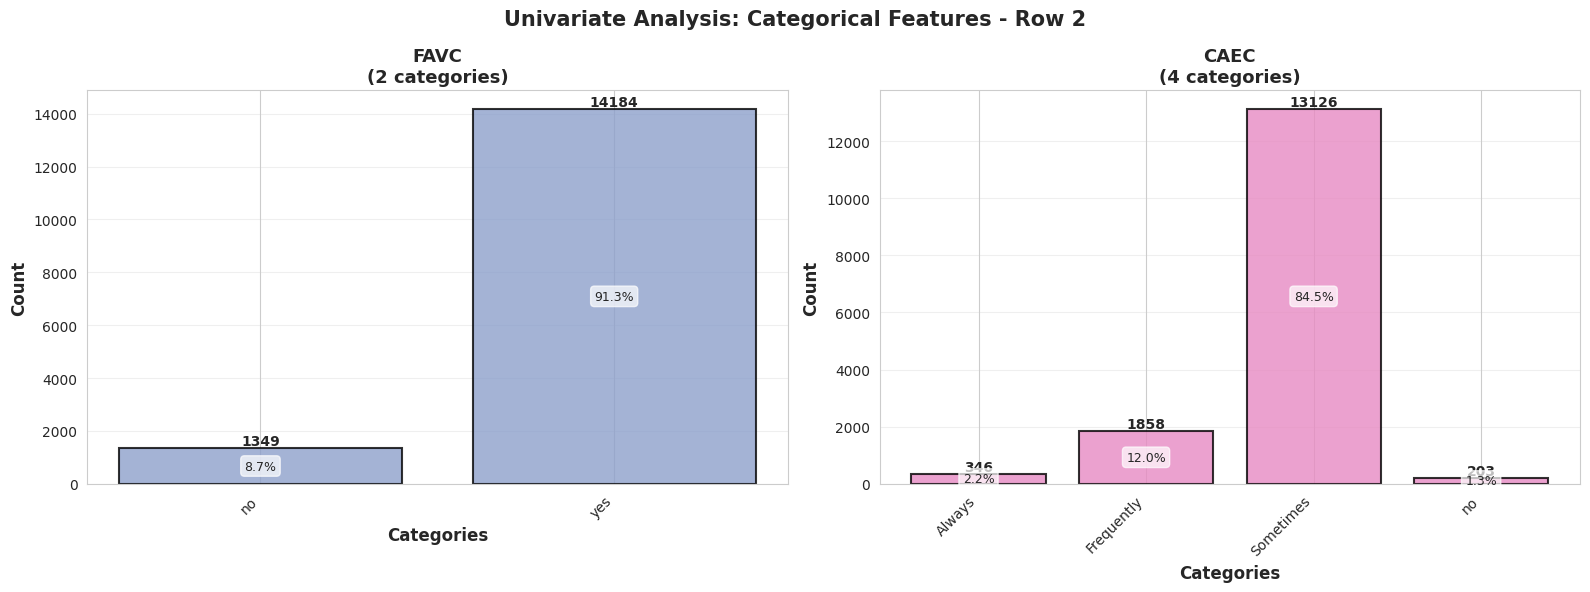

Saved: univariate_categorical_row2.png


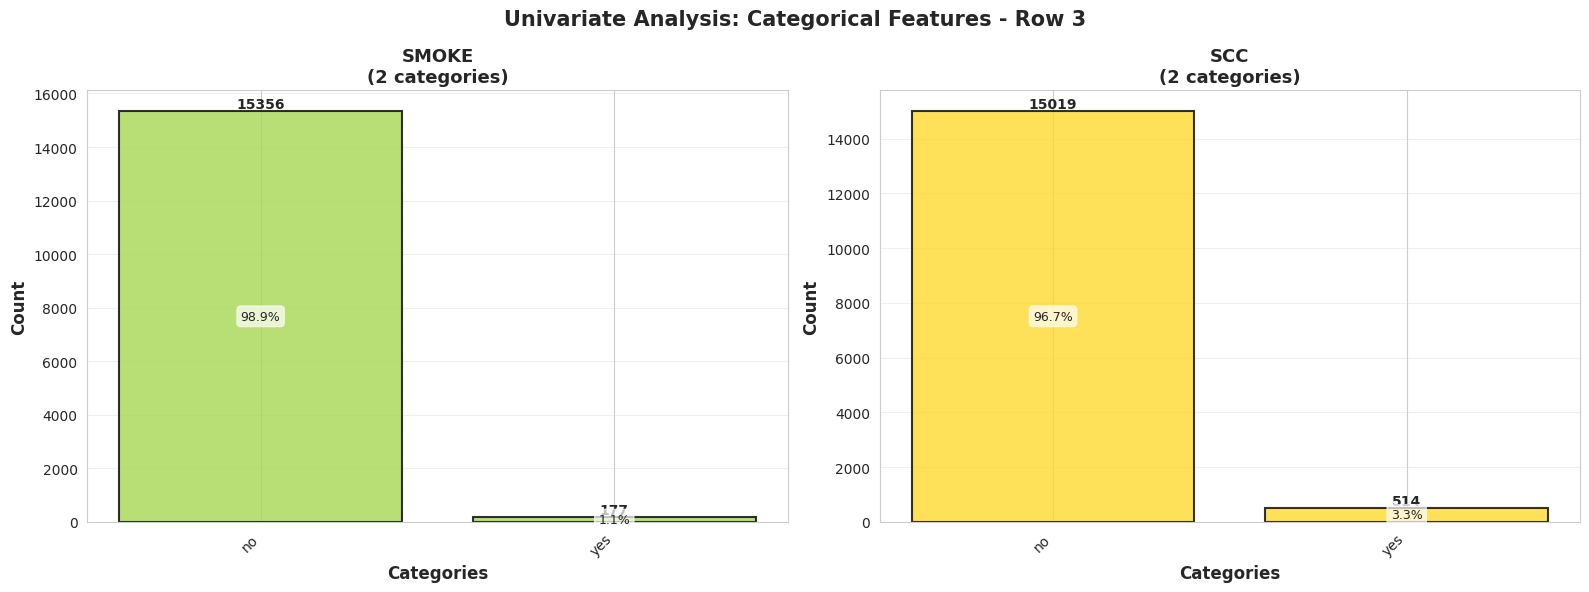

Saved: univariate_categorical_row3.png


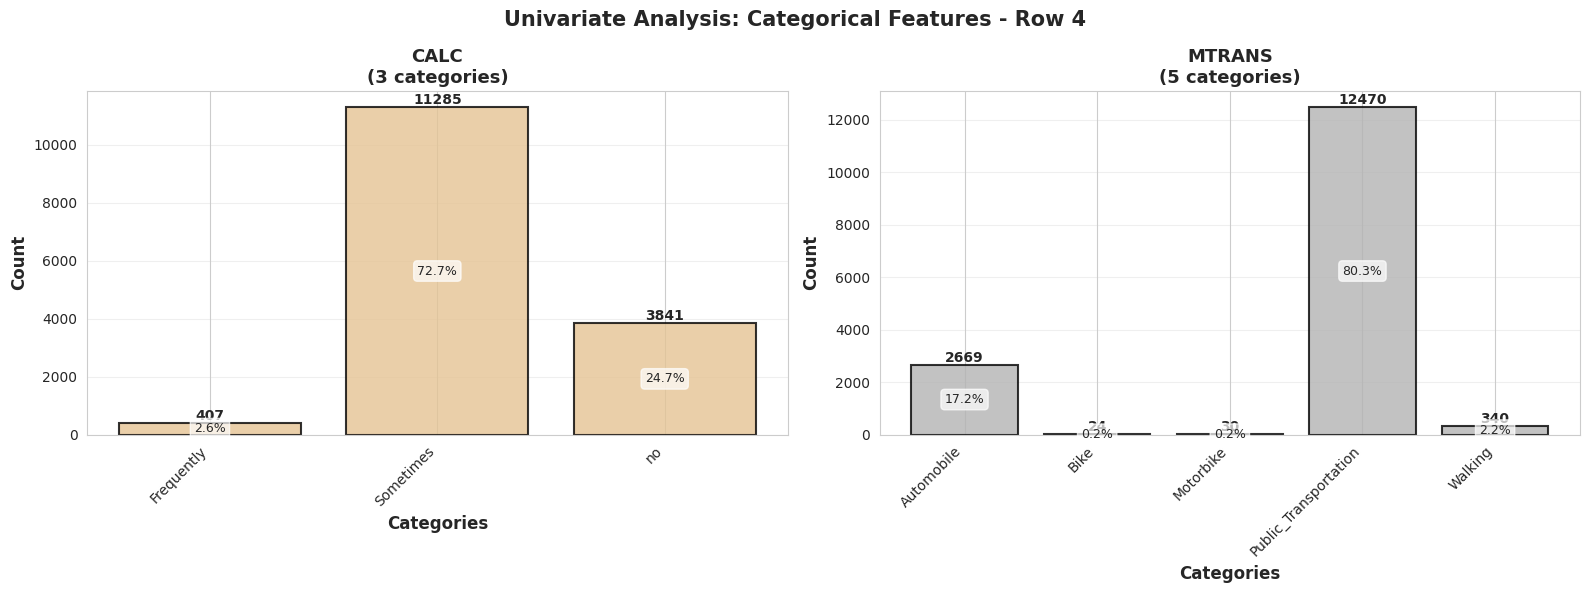

Saved: univariate_categorical_row4.png

All categorical feature rows saved


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

categorical_features = ['Gender', 'family_history_with_overweight', 'FAVC',
                       'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']

print("Creating categorical feature count plots (2 per row)...")

for img_idx in range(0, len(categorical_features), 2):
    features_subset = categorical_features[img_idx:img_idx+2]

    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    if len(features_subset) == 1:
        axes = [axes]

    for idx, feature in enumerate(features_subset):
        ax = axes[idx]

        counts = train[feature].value_counts().sort_index()
        color_idx = categorical_features.index(feature)

        ax.bar(range(len(counts)), counts.values,
              color=sns.color_palette("Set2")[color_idx],
              edgecolor='black', alpha=0.8, linewidth=1.5)

        ax.set_title(f'{feature}\n({len(counts)} categories)',
                    fontsize=13, fontweight='bold')
        ax.set_xlabel('Categories', fontsize=12, fontweight='bold')
        ax.set_ylabel('Count', fontsize=12, fontweight='bold')
        ax.set_xticks(range(len(counts)))
        ax.set_xticklabels(counts.index, rotation=45, ha='right', fontsize=10)
        ax.grid(axis='y', alpha=0.3)

        for i, count in enumerate(counts.values):
            ax.text(i, count, f'{int(count)}',
                   ha='center', va='bottom', fontsize=10, fontweight='bold')

        total = counts.sum()
        for i, count in enumerate(counts.values):
            percentage = (count / total) * 100
            ax.text(i, count * 0.5, f'{percentage:.1f}%',
                   ha='center', va='center', fontsize=9,
                   bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))

    if len(features_subset) == 1 and len(axes) > 1:
        fig.delaxes(axes[1])

    plt.suptitle(f'Univariate Analysis: Categorical Features - Row {img_idx//2 + 1}',
                fontsize=15, fontweight='bold')
    plt.tight_layout()

    filename = f'univariate_categorical_row{img_idx//2 + 1}.png'
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()

    print(f"Saved: {filename}")

print("\nAll categorical feature rows saved")

## 4.3 Outlier Detection and Analysis

OUTLIER DETECTION ANALYSIS

OUTLIER DETECTION SUMMARY

 Feature  IQR_Outliers  IQR_Percentage  ZScore_Outliers  ZScore_Percentage  MAD_Outliers  MAD_Percentage
    Age           792        5.098822              212           1.364836           316        2.034378
 Height             4        0.025752                4           0.025752             0        0.000000
 Weight             0        0.000000                0           0.000000             0        0.000000
   FCVC             0        0.000000                0           0.000000             0        0.000000
    NCP          4548       29.279598                0           0.000000             0        0.000000
   CH2O             0        0.000000                0           0.000000             0        0.000000
    FAF             0        0.000000                0           0.000000             0        0.000000
    TUE             0        0.000000                0           0.000000             0        0.000000

DETAILE

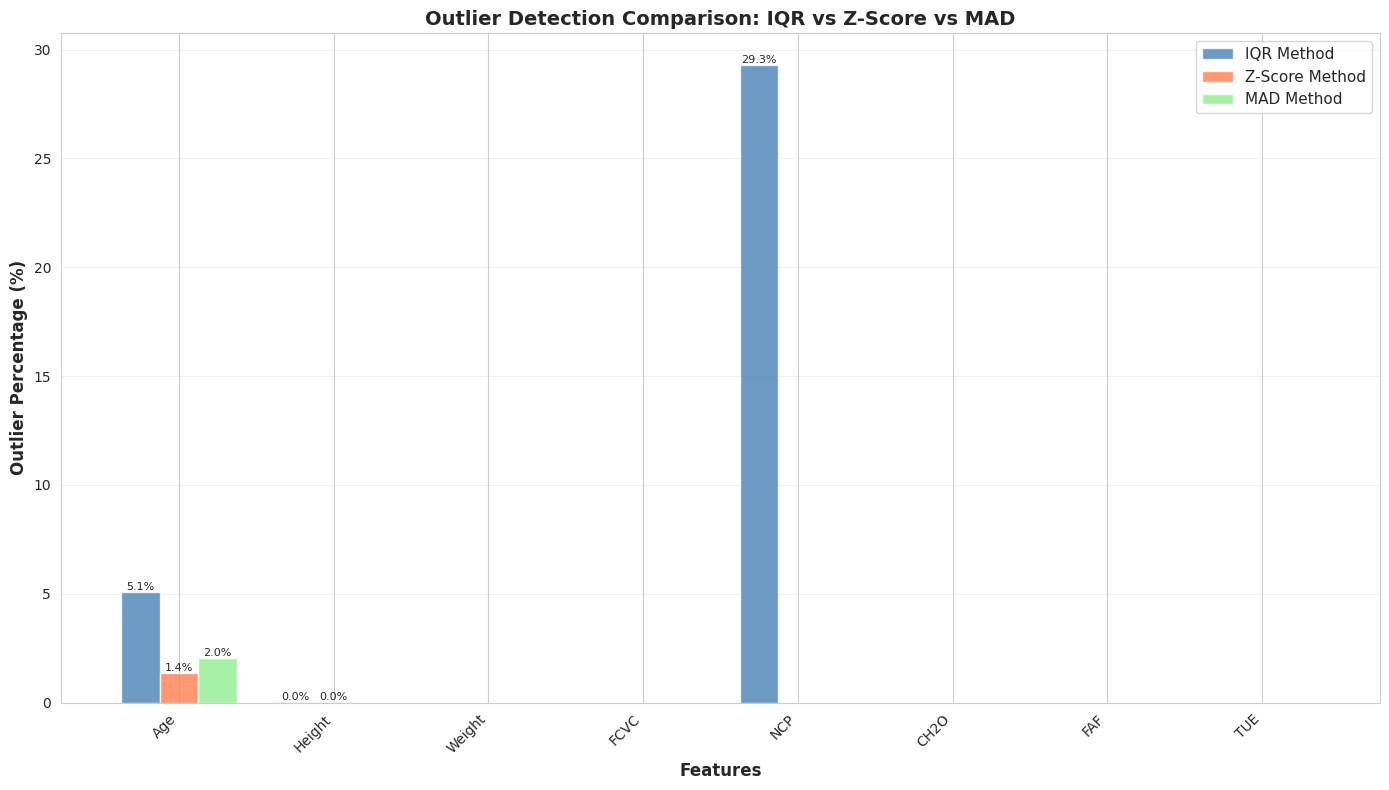

Saved: outlier_comparison.png


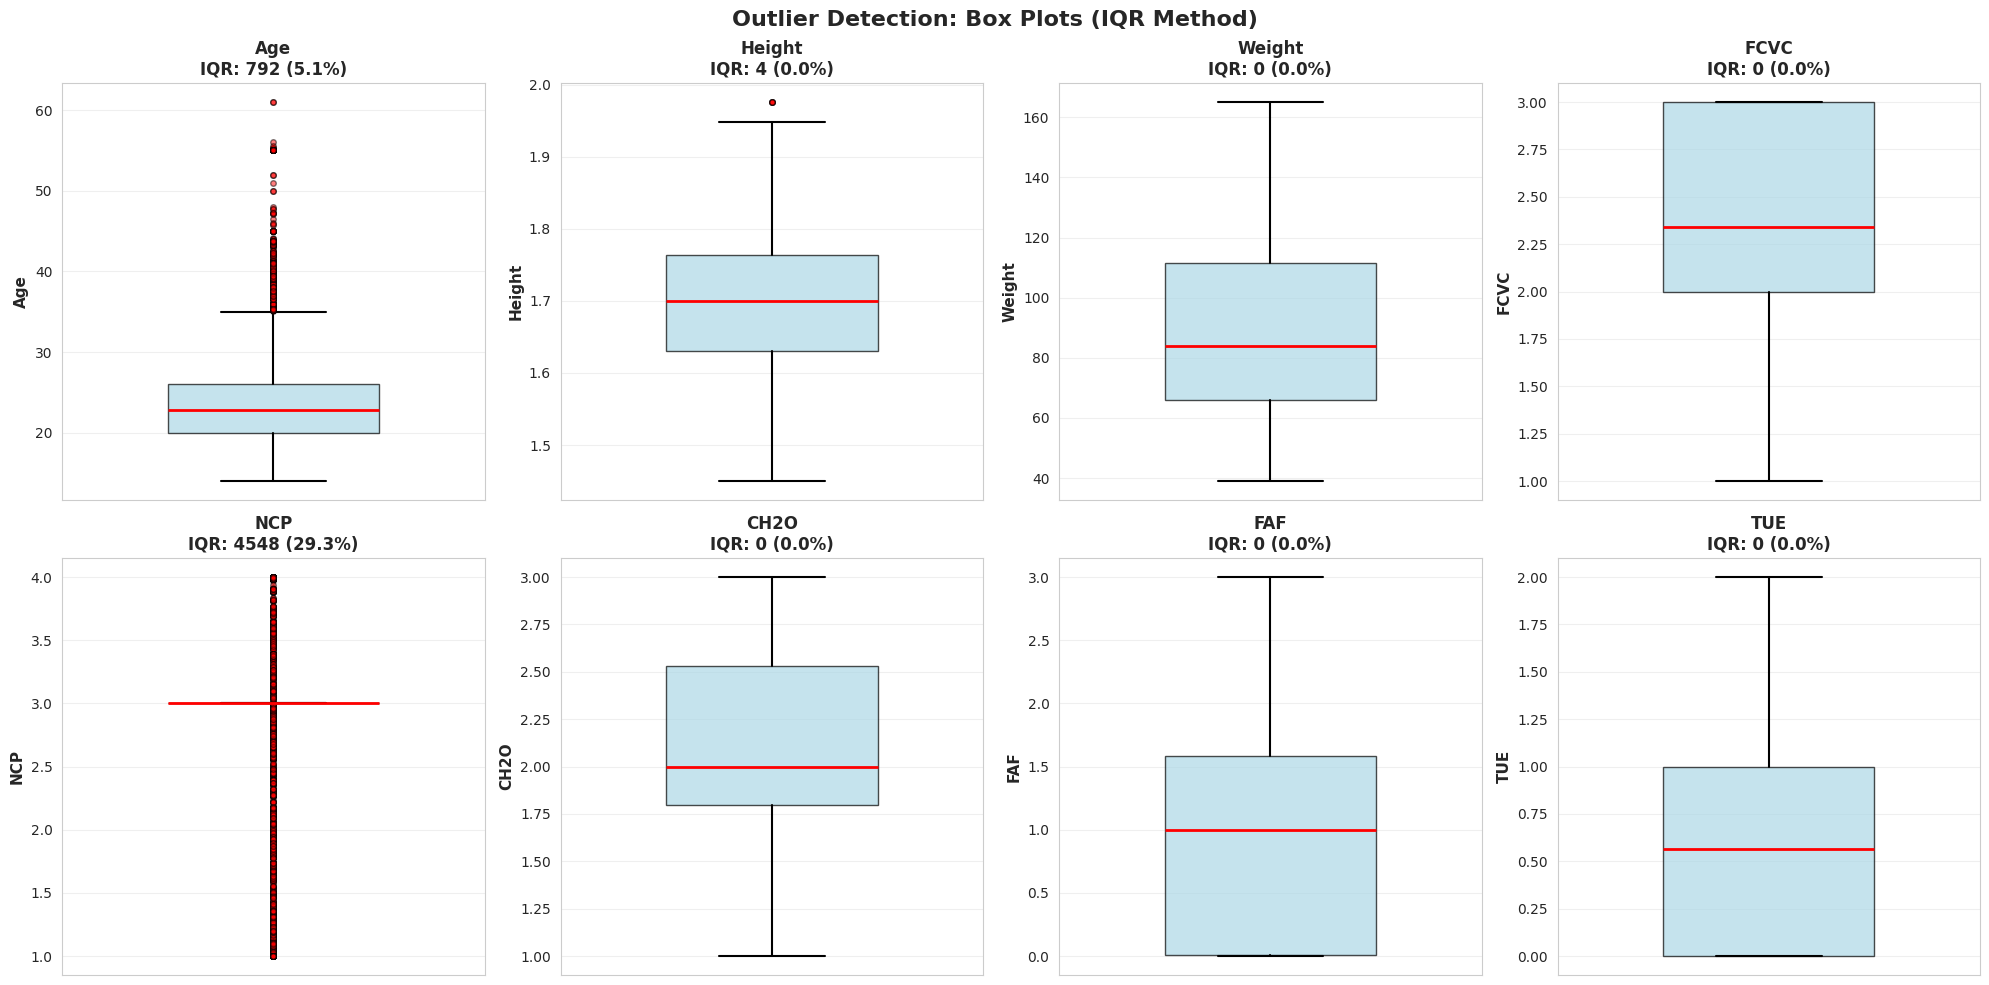

Saved: outlier_boxplots_detailed.png

Summary saved: outlier_detection_summary.csv

OVERALL SUMMARY

Total features analyzed: 8

Features with outliers (IQR method):
  3/8: ['Age', 'Height', 'NCP']

Features with high outlier percentage (>5% by IQR):
  - Age: 5.1%
  - NCP: 29.3%

Features with no outliers (all methods):
  5/8: ['Weight', 'FCVC', 'CH2O', 'FAF', 'TUE']

METHOD COMPARISON ANALYSIS

Average outlier detection rates:
  IQR Method:    4.30%
  Z-Score Method: 0.17%
  MAD Method:    0.25%

Method sensitivity ranking (total outliers detected):
  IQR:    5344 outliers
  Z-Score: 216 outliers
  MAD:    316 outliers


In [31]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

print("="*80)
print("OUTLIER DETECTION ANALYSIS")
print("="*80)

numerical_features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

outlier_results = []

for feature in numerical_features:
    data = train[feature].dropna()
    n_total = len(data)

    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound_iqr = Q1 - 1.5 * IQR
    upper_bound_iqr = Q3 + 1.5 * IQR
    iqr_outliers = data[(data < lower_bound_iqr) | (data > upper_bound_iqr)]
    n_iqr = len(iqr_outliers)
    pct_iqr = (n_iqr / n_total) * 100

    z_scores = np.abs(stats.zscore(data))
    z_outliers = data[z_scores > 3]
    n_z = len(z_outliers)
    pct_z = (n_z / n_total) * 100

    median = np.median(data)
    mad = np.median(np.abs(data - median))

    if mad == 0:
        mad = np.std(data)

    modified_z_scores = 0.6745 * (data - median) / mad
    mad_outliers = data[np.abs(modified_z_scores) > 3.5]
    n_mad = len(mad_outliers)
    pct_mad = (n_mad / n_total) * 100

    outlier_results.append({
        'Feature': feature,
        'Total_Count': n_total,
        'IQR_Outliers': n_iqr,
        'IQR_Percentage': pct_iqr,
        'ZScore_Outliers': n_z,
        'ZScore_Percentage': pct_z,
        'MAD_Outliers': n_mad,
        'MAD_Percentage': pct_mad,
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'Lower_Bound_IQR': lower_bound_iqr,
        'Upper_Bound_IQR': upper_bound_iqr
    })

outlier_df = pd.DataFrame(outlier_results)

print("\n" + "="*80)
print("OUTLIER DETECTION SUMMARY")
print("="*80)

print("\n", outlier_df[['Feature', 'IQR_Outliers', 'IQR_Percentage',
                        'ZScore_Outliers', 'ZScore_Percentage',
                        'MAD_Outliers', 'MAD_Percentage']].to_string(index=False))

print("\n" + "="*80)
print("DETAILED OUTLIER ANALYSIS")
print("="*80)

for _, row in outlier_df.iterrows():
    print(f"\n{row['Feature']}:")
    print(f"  Total samples: {int(row['Total_Count'])}")
    print(f"  Q1: {row['Q1']:.2f}, Q3: {row['Q3']:.2f}, IQR: {row['IQR']:.2f}")
    print(f"  IQR bounds: [{row['Lower_Bound_IQR']:.2f}, {row['Upper_Bound_IQR']:.2f}]")
    print(f"  IQR outliers: {int(row['IQR_Outliers'])} ({row['IQR_Percentage']:.2f}%)")
    print(f"  Z-Score outliers: {int(row['ZScore_Outliers'])} ({row['ZScore_Percentage']:.2f}%)")
    print(f"  MAD outliers: {int(row['MAD_Outliers'])} ({row['MAD_Percentage']:.2f}%)")

print("\n" + "="*80)
print("CREATING VISUALIZATIONS")
print("="*80)

fig, ax = plt.subplots(figsize=(14, 8))

x = np.arange(len(numerical_features))
width = 0.25

bars1 = ax.bar(x - width, outlier_df['IQR_Percentage'], width,
              label='IQR Method', color='steelblue', alpha=0.8)
bars2 = ax.bar(x, outlier_df['ZScore_Percentage'], width,
              label='Z-Score Method', color='coral', alpha=0.8)
bars3 = ax.bar(x + width, outlier_df['MAD_Percentage'], width,
              label='MAD Method', color='lightgreen', alpha=0.8)

ax.set_xlabel('Features', fontsize=12, fontweight='bold')
ax.set_ylabel('Outlier Percentage (%)', fontsize=12, fontweight='bold')
ax.set_title('Outlier Detection Comparison: IQR vs Z-Score vs MAD',
            fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(numerical_features, rotation=45, ha='right')
ax.legend(fontsize=11)
ax.grid(axis='y', alpha=0.3)

for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            ax.text(bar.get_x() + bar.get_width()/2., height,
                   f'{height:.1f}%', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.savefig('outlier_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("Saved: outlier_comparison.png")

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for idx, feature in enumerate(numerical_features):
    data = train[feature].dropna()

    row = outlier_df[outlier_df['Feature'] == feature].iloc[0]

    bp = axes[idx].boxplot([data], vert=True, patch_artist=True,
                           widths=0.5,
                           boxprops=dict(facecolor='lightblue', alpha=0.7),
                           medianprops=dict(color='red', linewidth=2),
                           whiskerprops=dict(color='black', linewidth=1.5),
                           capprops=dict(color='black', linewidth=1.5),
                           flierprops=dict(marker='o', markerfacecolor='red',
                                          markersize=4, alpha=0.5))

    axes[idx].set_ylabel(feature, fontsize=11, fontweight='bold')
    axes[idx].set_title(f'{feature}\nIQR: {int(row["IQR_Outliers"])} ({row["IQR_Percentage"]:.1f}%)',
                       fontsize=12, fontweight='bold')
    axes[idx].set_xticks([])
    axes[idx].grid(alpha=0.3, axis='y')

plt.suptitle('Outlier Detection: Box Plots (IQR Method)',
            fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('outlier_boxplots_detailed.png', dpi=300, bbox_inches='tight')
plt.show()

print("Saved: outlier_boxplots_detailed.png")

outlier_df.to_csv('outlier_detection_summary.csv', index=False)
print("\nSummary saved: outlier_detection_summary.csv")

print("\n" + "="*80)
print("OVERALL SUMMARY")
print("="*80)

print(f"\nTotal features analyzed: {len(numerical_features)}")
print(f"\nFeatures with outliers (IQR method):")
features_with_outliers = outlier_df[outlier_df['IQR_Outliers'] > 0]['Feature'].tolist()
print(f"  {len(features_with_outliers)}/8: {features_with_outliers}")

print(f"\nFeatures with high outlier percentage (>5% by IQR):")
high_outliers = outlier_df[outlier_df['IQR_Percentage'] > 5.0]
for _, row in high_outliers.iterrows():
    print(f"  - {row['Feature']}: {row['IQR_Percentage']:.1f}%")

print(f"\nFeatures with no outliers (all methods):")
no_outliers = outlier_df[(outlier_df['IQR_Outliers'] == 0) &
                         (outlier_df['ZScore_Outliers'] == 0) &
                         (outlier_df['MAD_Outliers'] == 0)]['Feature'].tolist()
print(f"  {len(no_outliers)}/8: {no_outliers}")

print("\n" + "="*80)
print("METHOD COMPARISON ANALYSIS")
print("="*80)

print("\nAverage outlier detection rates:")
print(f"  IQR Method:    {outlier_df['IQR_Percentage'].mean():.2f}%")
print(f"  Z-Score Method: {outlier_df['ZScore_Percentage'].mean():.2f}%")
print(f"  MAD Method:    {outlier_df['MAD_Percentage'].mean():.2f}%")

print("\nMethod sensitivity ranking (total outliers detected):")
print(f"  IQR:    {int(outlier_df['IQR_Outliers'].sum())} outliers")
print(f"  Z-Score: {int(outlier_df['ZScore_Outliers'].sum())} outliers")
print(f"  MAD:    {int(outlier_df['MAD_Outliers'].sum())} outliers")

## 4.4 Bivariate Analysis: Categorical Features vs Target

CHI-SQUARE TEST AND CRAMER'S V ANALYSIS

CATEGORICAL FEATURES vs WEIGHTCATEGORY

Gender:
  Chi-square statistic: 5890.64
  Degrees of freedom: 6
  p-value: 0.0000e+00 ***
  Cramer's V: 0.6158 (Strong association)

family_history_with_overweight:
  Chi-square statistic: 4854.76
  Degrees of freedom: 6
  p-value: 0.0000e+00 ***
  Cramer's V: 0.5591 (Strong association)

FAVC:
  Chi-square statistic: 1174.04
  Degrees of freedom: 6
  p-value: 1.9877e-250 ***
  Cramer's V: 0.2749 (Moderate association)

CAEC:
  Chi-square statistic: 5117.51
  Degrees of freedom: 18
  p-value: 0.0000e+00 ***
  Cramer's V: 0.3314 (Strong association)

SMOKE:
  Chi-square statistic: 162.67
  Degrees of freedom: 6
  p-value: 1.6121e-32 ***
  Cramer's V: 0.1023 (Moderate association)

SCC:
  Chi-square statistic: 739.14
  Degrees of freedom: 6
  p-value: 2.1640e-156 ***
  Cramer's V: 0.2181 (Moderate association)

CALC:
  Chi-square statistic: 2980.38
  Degrees of freedom: 12
  p-value: 0.0000e+00 ***
  Cramer'

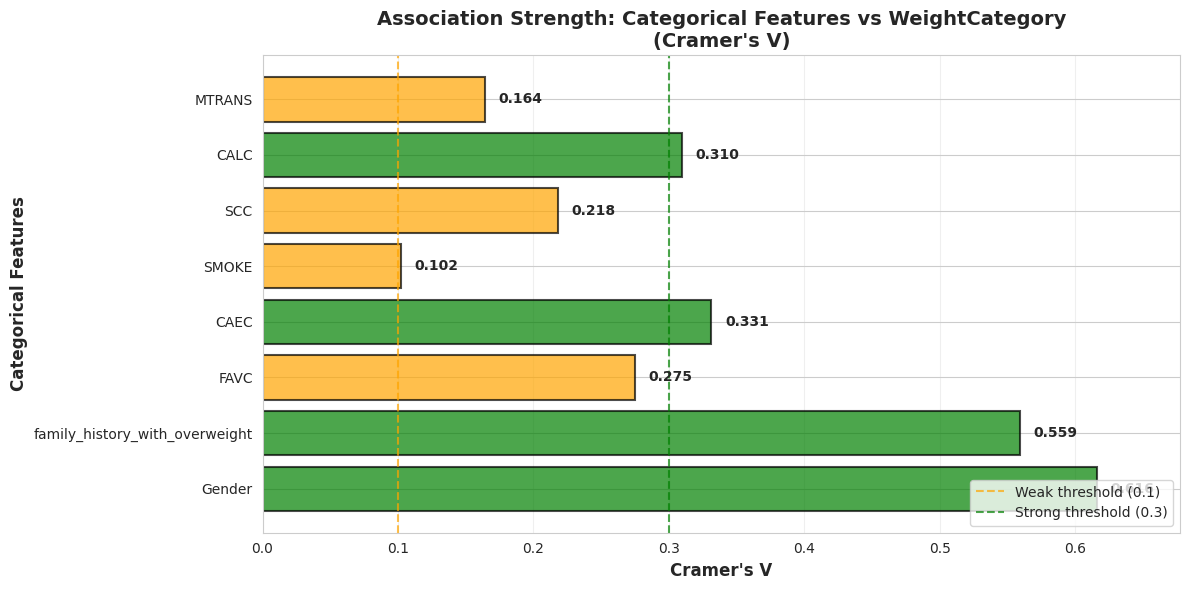

Saved: cramers_v_association.png

Creating contingency table heatmaps...


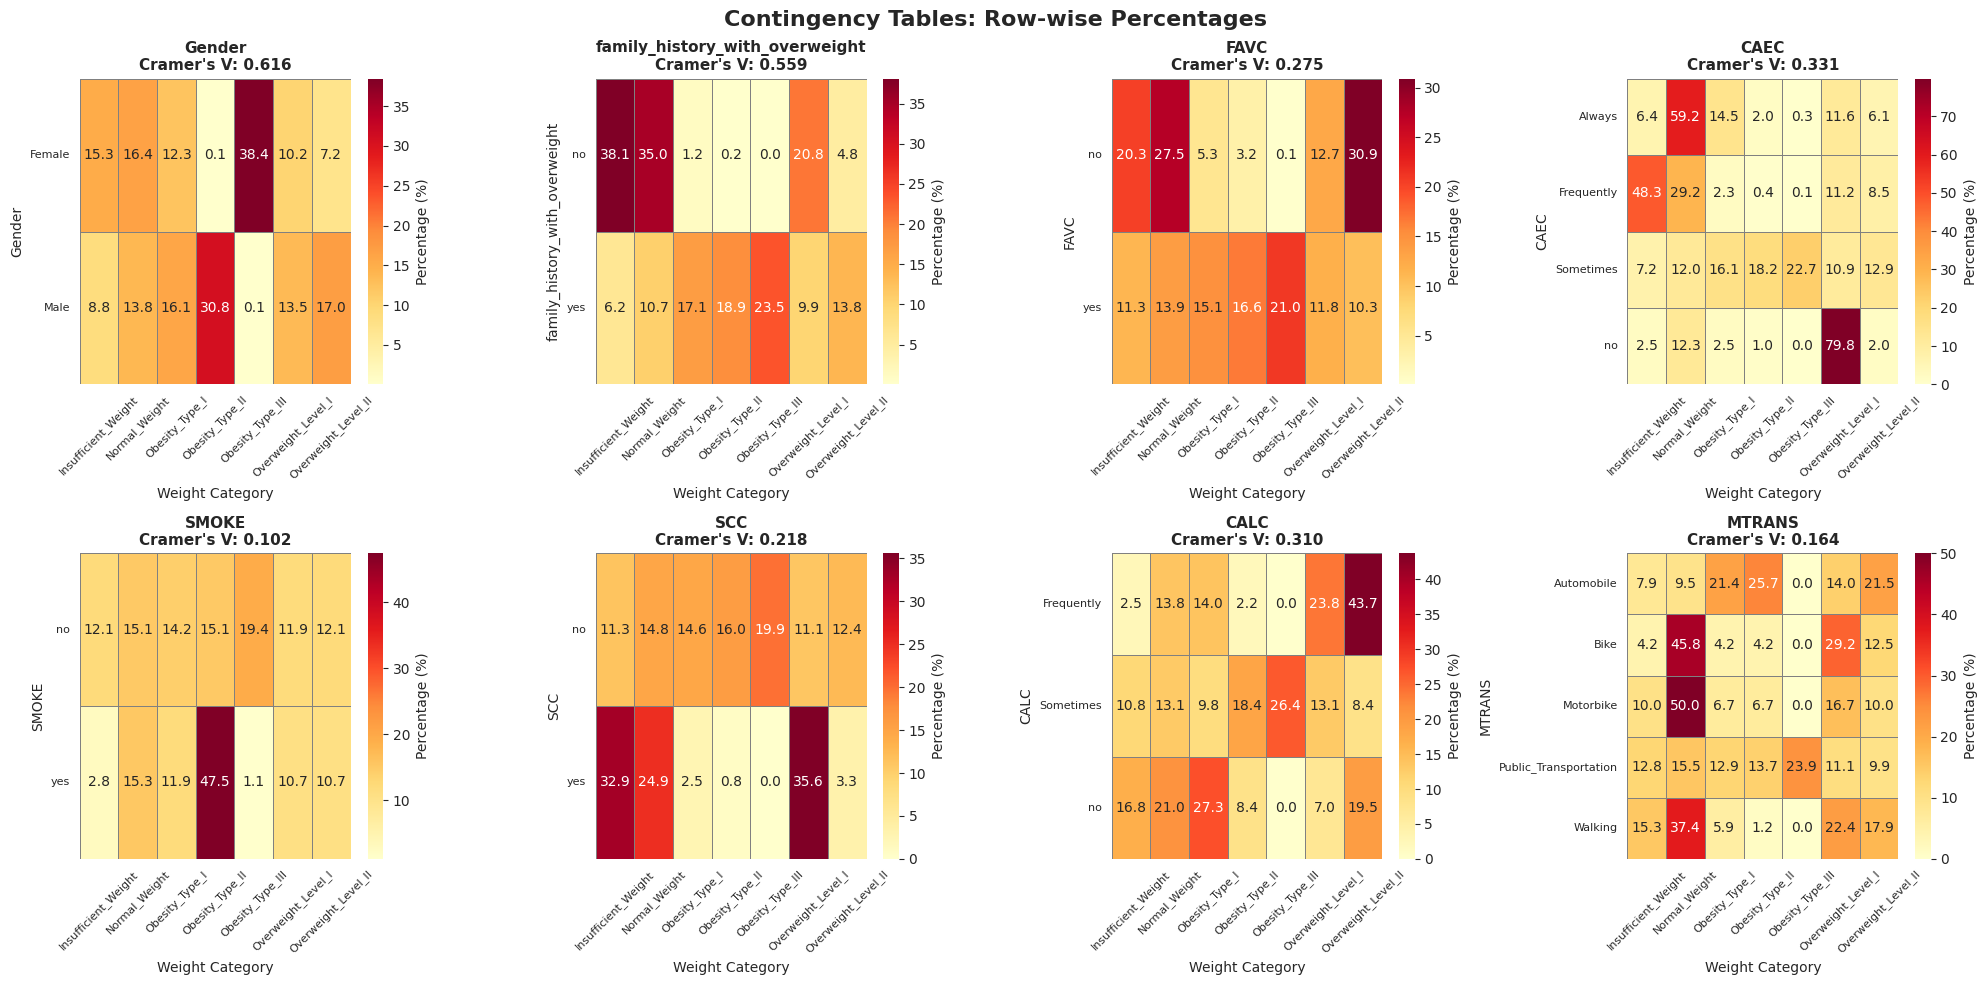

Saved: contingency_heatmaps.png


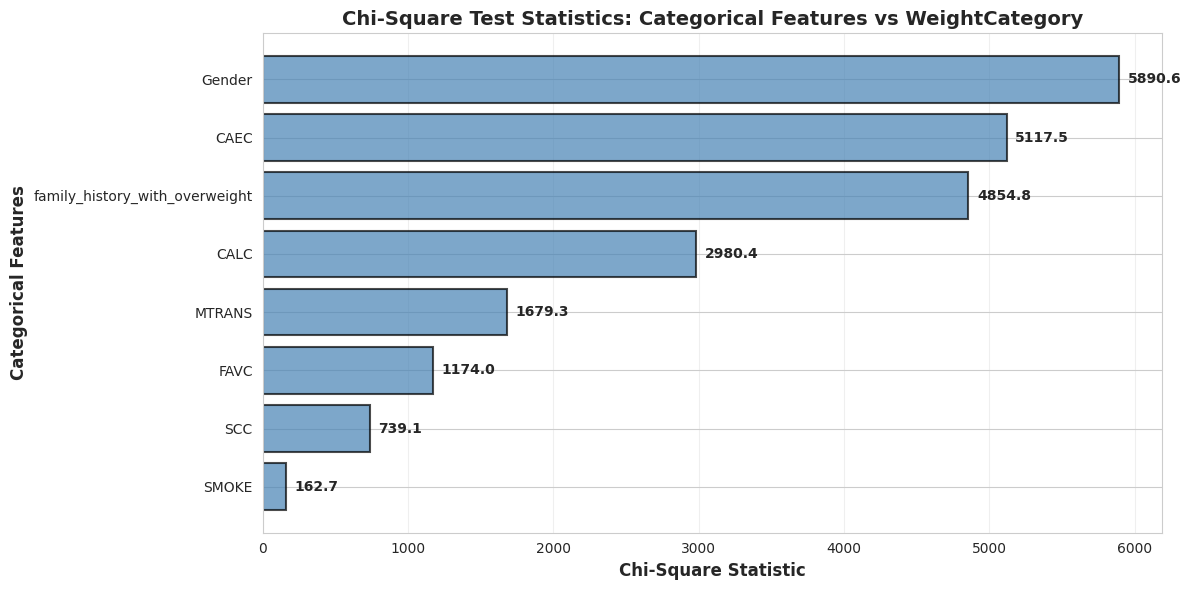

Saved: chi_square_comparison.png

Results saved: chi_square_cramers_v_results.csv


In [32]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

print("="*80)
print("CHI-SQUARE TEST AND CRAMER'S V ANALYSIS")
print("="*80)

categorical_features = ['Gender', 'family_history_with_overweight', 'FAVC',
                       'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
target = 'WeightCategory'

def cramers_v(contingency_table):
    chi2 = chi2_contingency(contingency_table)[0]
    n = contingency_table.sum().sum()
    min_dim = min(contingency_table.shape) - 1

    if min_dim == 0:
        return 0

    cramers = np.sqrt(chi2 / (n * min_dim))
    return cramers

chi_square_results = []

print("\n" + "="*80)
print("CATEGORICAL FEATURES vs WEIGHTCATEGORY")
print("="*80)

for feature in categorical_features:
    contingency_table = pd.crosstab(train[feature], train[target])

    chi2, p_value, dof, expected = chi2_contingency(contingency_table)

    cramers_v_value = cramers_v(contingency_table)

    if p_value < 0.001:
        significance = "***"
    elif p_value < 0.01:
        significance = "**"
    elif p_value < 0.05:
        significance = "*"
    else:
        significance = "ns"

    if cramers_v_value < 0.1:
        strength = "Weak"
    elif cramers_v_value < 0.3:
        strength = "Moderate"
    else:
        strength = "Strong"

    chi_square_results.append({
        'Feature': feature,
        'Chi2_Statistic': chi2,
        'Degrees_of_Freedom': dof,
        'p_value': p_value,
        'Cramers_V': cramers_v_value,
        'Significance': significance,
        'Association_Strength': strength,
        'Feature_Categories': len(train[feature].unique()),
        'Target_Categories': len(train[target].unique())
    })

    print(f"\n{feature}:")
    print(f"  Chi-square statistic: {chi2:.2f}")
    print(f"  Degrees of freedom: {dof}")
    print(f"  p-value: {p_value:.4e} {significance}")
    print(f"  Cramer's V: {cramers_v_value:.4f} ({strength} association)")

results_df = pd.DataFrame(chi_square_results)

print("\n" + "="*80)
print("SUMMARY TABLE")
print("="*80)

print("\n", results_df[['Feature', 'Chi2_Statistic', 'p_value',
                        'Cramers_V', 'Association_Strength']].to_string(index=False))

print("\n" + "="*80)
print("CREATING VISUALIZATIONS")
print("="*80)

fig, ax = plt.subplots(figsize=(12, 6))

colors = ['green' if v >= 0.3 else 'orange' if v >= 0.1 else 'red'
          for v in results_df['Cramers_V']]

bars = ax.barh(results_df['Feature'], results_df['Cramers_V'],
               color=colors, alpha=0.7, edgecolor='black', linewidth=1.5)

ax.set_xlabel("Cramer's V", fontsize=12, fontweight='bold')
ax.set_ylabel('Categorical Features', fontsize=12, fontweight='bold')
ax.set_title("Association Strength: Categorical Features vs WeightCategory\n(Cramer's V)",
            fontsize=14, fontweight='bold')
ax.set_xlim(0, max(results_df['Cramers_V']) * 1.1)

ax.axvline(x=0.1, color='orange', linestyle='--', linewidth=1.5, alpha=0.7, label='Weak threshold (0.1)')
ax.axvline(x=0.3, color='green', linestyle='--', linewidth=1.5, alpha=0.7, label='Strong threshold (0.3)')

for bar, v in zip(bars, results_df['Cramers_V']):
    width = bar.get_width()
    ax.text(width + 0.01, bar.get_y() + bar.get_height()/2.,
           f'{v:.3f}', ha='left', va='center', fontsize=10, fontweight='bold')

ax.legend(loc='lower right', fontsize=10)
ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('cramers_v_association.png', dpi=300, bbox_inches='tight')
plt.show()

print("Saved: cramers_v_association.png")

print("\nCreating contingency table heatmaps...")

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for idx, feature in enumerate(categorical_features):
    ax = axes[idx]

    contingency = pd.crosstab(train[feature], train[target], normalize='index') * 100

    cramers = results_df[results_df['Feature'] == feature]['Cramers_V'].values[0]

    sns.heatmap(contingency, annot=True, fmt='.1f', cmap='YlOrRd',
               cbar_kws={'label': 'Percentage (%)'}, ax=ax,
               linewidths=0.5, linecolor='gray')

    ax.set_title(f"{feature}\nCramer's V: {cramers:.3f}",
                fontsize=11, fontweight='bold')
    ax.set_xlabel('Weight Category', fontsize=10)
    ax.set_ylabel(feature, fontsize=10)
    ax.tick_params(axis='x', rotation=45, labelsize=8)
    ax.tick_params(axis='y', rotation=0, labelsize=8)

plt.suptitle('Contingency Tables: Row-wise Percentages',
            fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('contingency_heatmaps.png', dpi=300, bbox_inches='tight')
plt.show()

print("Saved: contingency_heatmaps.png")

fig, ax = plt.subplots(figsize=(12, 6))

results_sorted = results_df.sort_values('Chi2_Statistic', ascending=True)

bars = ax.barh(results_sorted['Feature'], results_sorted['Chi2_Statistic'],
              color='steelblue', alpha=0.7, edgecolor='black', linewidth=1.5)

ax.set_xlabel('Chi-Square Statistic', fontsize=12, fontweight='bold')
ax.set_ylabel('Categorical Features', fontsize=12, fontweight='bold')
ax.set_title('Chi-Square Test Statistics: Categorical Features vs WeightCategory',
            fontsize=14, fontweight='bold')
ax.grid(axis='x', alpha=0.3)

for bar, chi2 in zip(bars, results_sorted['Chi2_Statistic']):
    width = bar.get_width()
    ax.text(width + max(results_sorted['Chi2_Statistic'])*0.01,
           bar.get_y() + bar.get_height()/2.,
           f'{chi2:.1f}', ha='left', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('chi_square_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("Saved: chi_square_comparison.png")

results_df.to_csv('chi_square_cramers_v_results.csv', index=False)
print("\nResults saved: chi_square_cramers_v_results.csv")

## 4.5 Bivariate Analysis

Creating bivariate box plots...


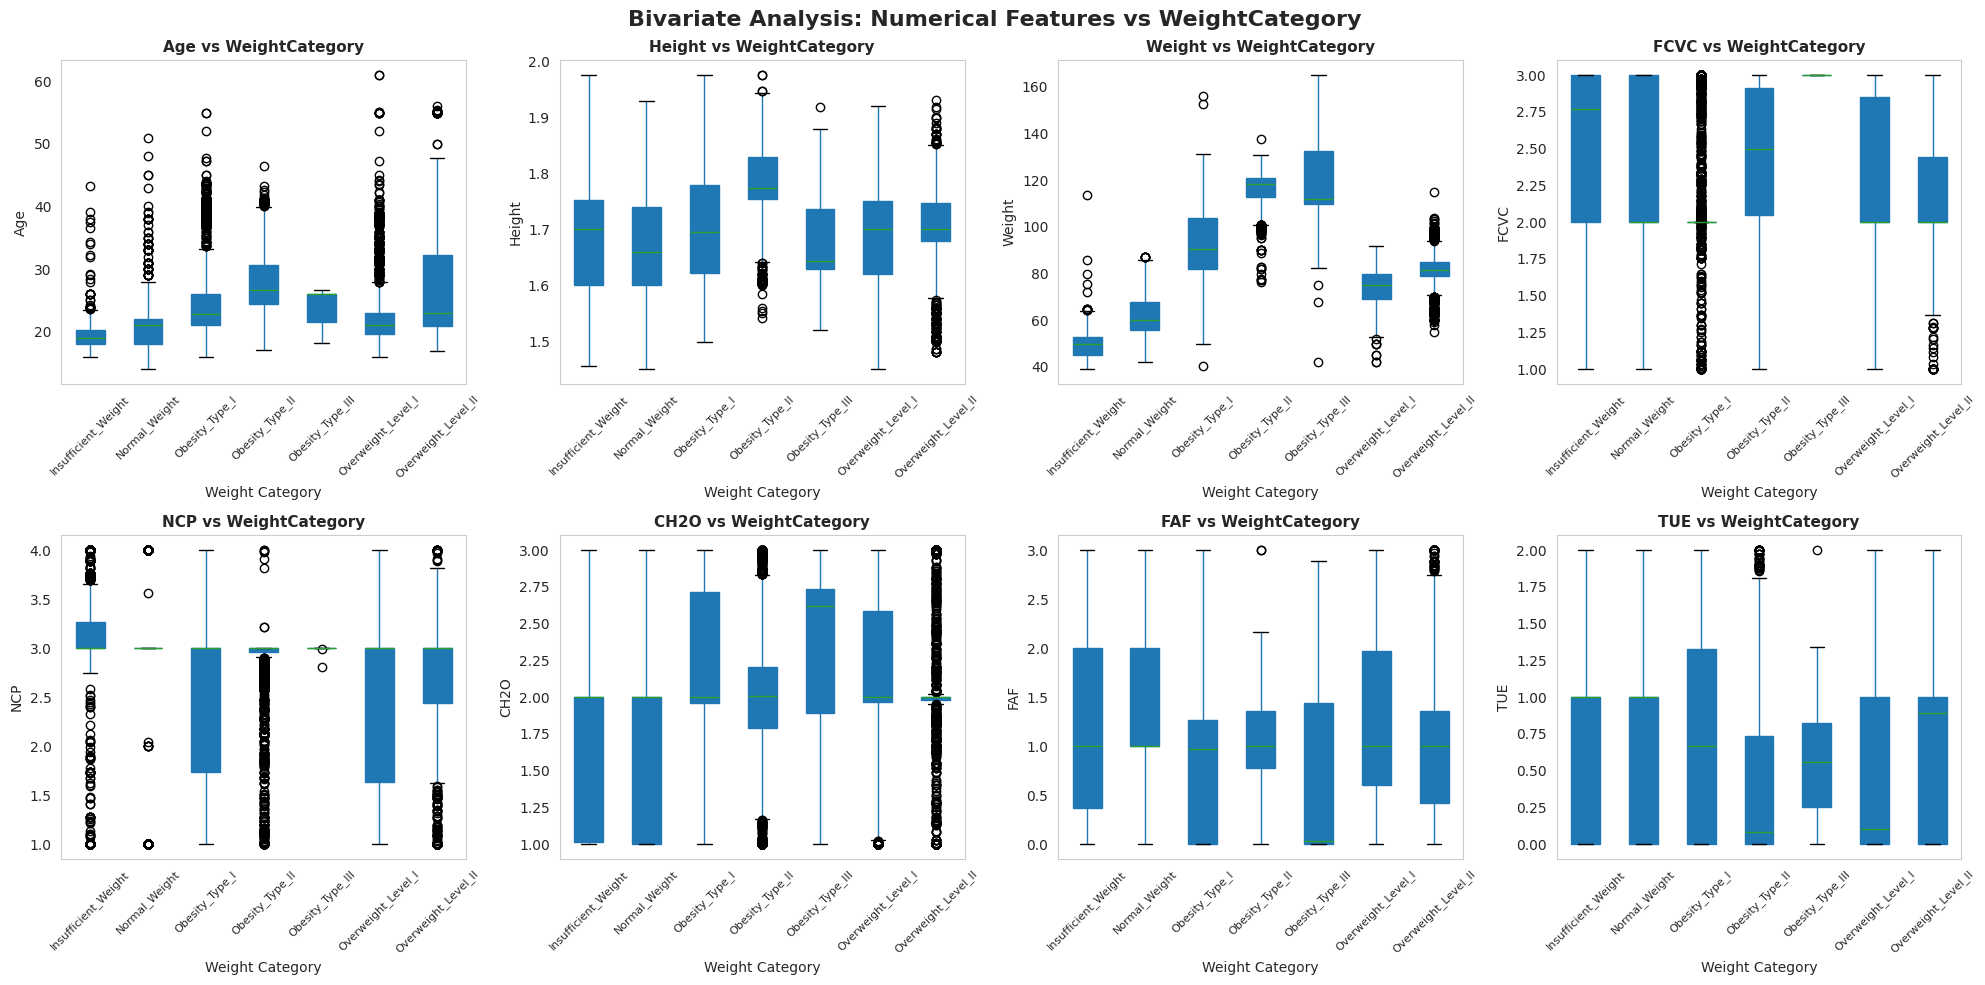

Saved: bivariate_boxplots.png


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

numerical_features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
target = 'WeightCategory'

print("Creating bivariate box plots...")

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for idx, feature in enumerate(numerical_features):
    ax = axes[idx]

    train.boxplot(column=feature, by=target, ax=ax,
                 patch_artist=True, grid=False)

    ax.set_title(f"{feature} vs WeightCategory",
                fontsize=11, fontweight='bold')
    ax.set_xlabel('Weight Category', fontsize=10)
    ax.set_ylabel(feature, fontsize=10)
    ax.tick_params(axis='x', rotation=45, labelsize=8)
    plt.suptitle('')

plt.suptitle('Bivariate Analysis: Numerical Features vs WeightCategory',
            fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('bivariate_boxplots.png', dpi=300, bbox_inches='tight')
plt.show()

print("Saved: bivariate_boxplots.png")

## 4.6 Multivariate Analysis and Feature Interactions

## 4.6.1 Correlation Analysis

CORRELATION ANALYSIS: PEARSON AND SPEARMAN

CORRELATION ANALYSIS FOR FEATURE PAIRS

FCVC <-> FAF:
  Pearson r: -0.0811, p-value: 4.3601e-24
  Spearman ρ: -0.0857, p-value: 1.0747e-26

FAF <-> TUE:
  Pearson r: 0.0149, p-value: 6.2856e-02
  Spearman ρ: -0.0165, p-value: 3.9696e-02

FCVC <-> TUE:
  Pearson r: -0.1503, p-value: 3.7998e-79
  Spearman ρ: -0.1335, p-value: 9.9145e-63

Height <-> Weight:
  Pearson r: 0.4207, p-value: 0.0000e+00
  Spearman ρ: 0.4241, p-value: 0.0000e+00

Age <-> Weight:
  Pearson r: 0.2803, p-value: 2.2689e-278
  Spearman ρ: 0.4380, p-value: 0.0000e+00

NCP <-> FCVC:
  Pearson r: 0.1073, p-value: 5.1526e-41
  Spearman ρ: 0.1286, p-value: 2.7626e-58

FULL CORRELATION MATRICES

Pearson Correlation Matrix:
          Age  Height  Weight   FCVC    NCP   CH2O    FAF    TUE
Age     1.000  -0.015   0.280  0.030 -0.051 -0.022 -0.194 -0.295
Height -0.015   1.000   0.421 -0.067  0.196  0.186  0.299  0.080
Weight  0.280   0.421   1.000  0.248  0.096  0.316 -0.076 -0.082
F

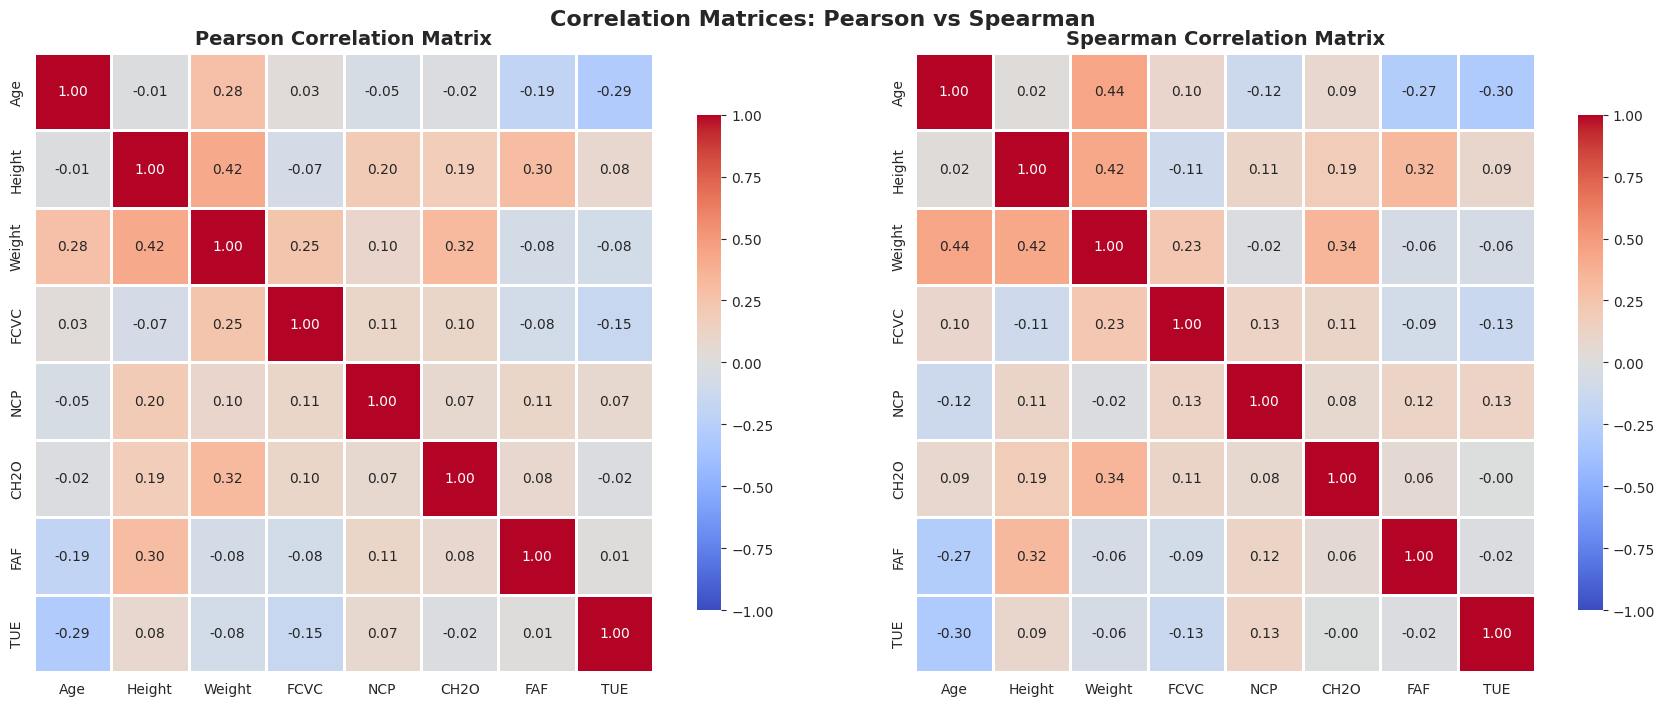

Saved: correlation_matrices.png

Creating scatter plots for key correlations...


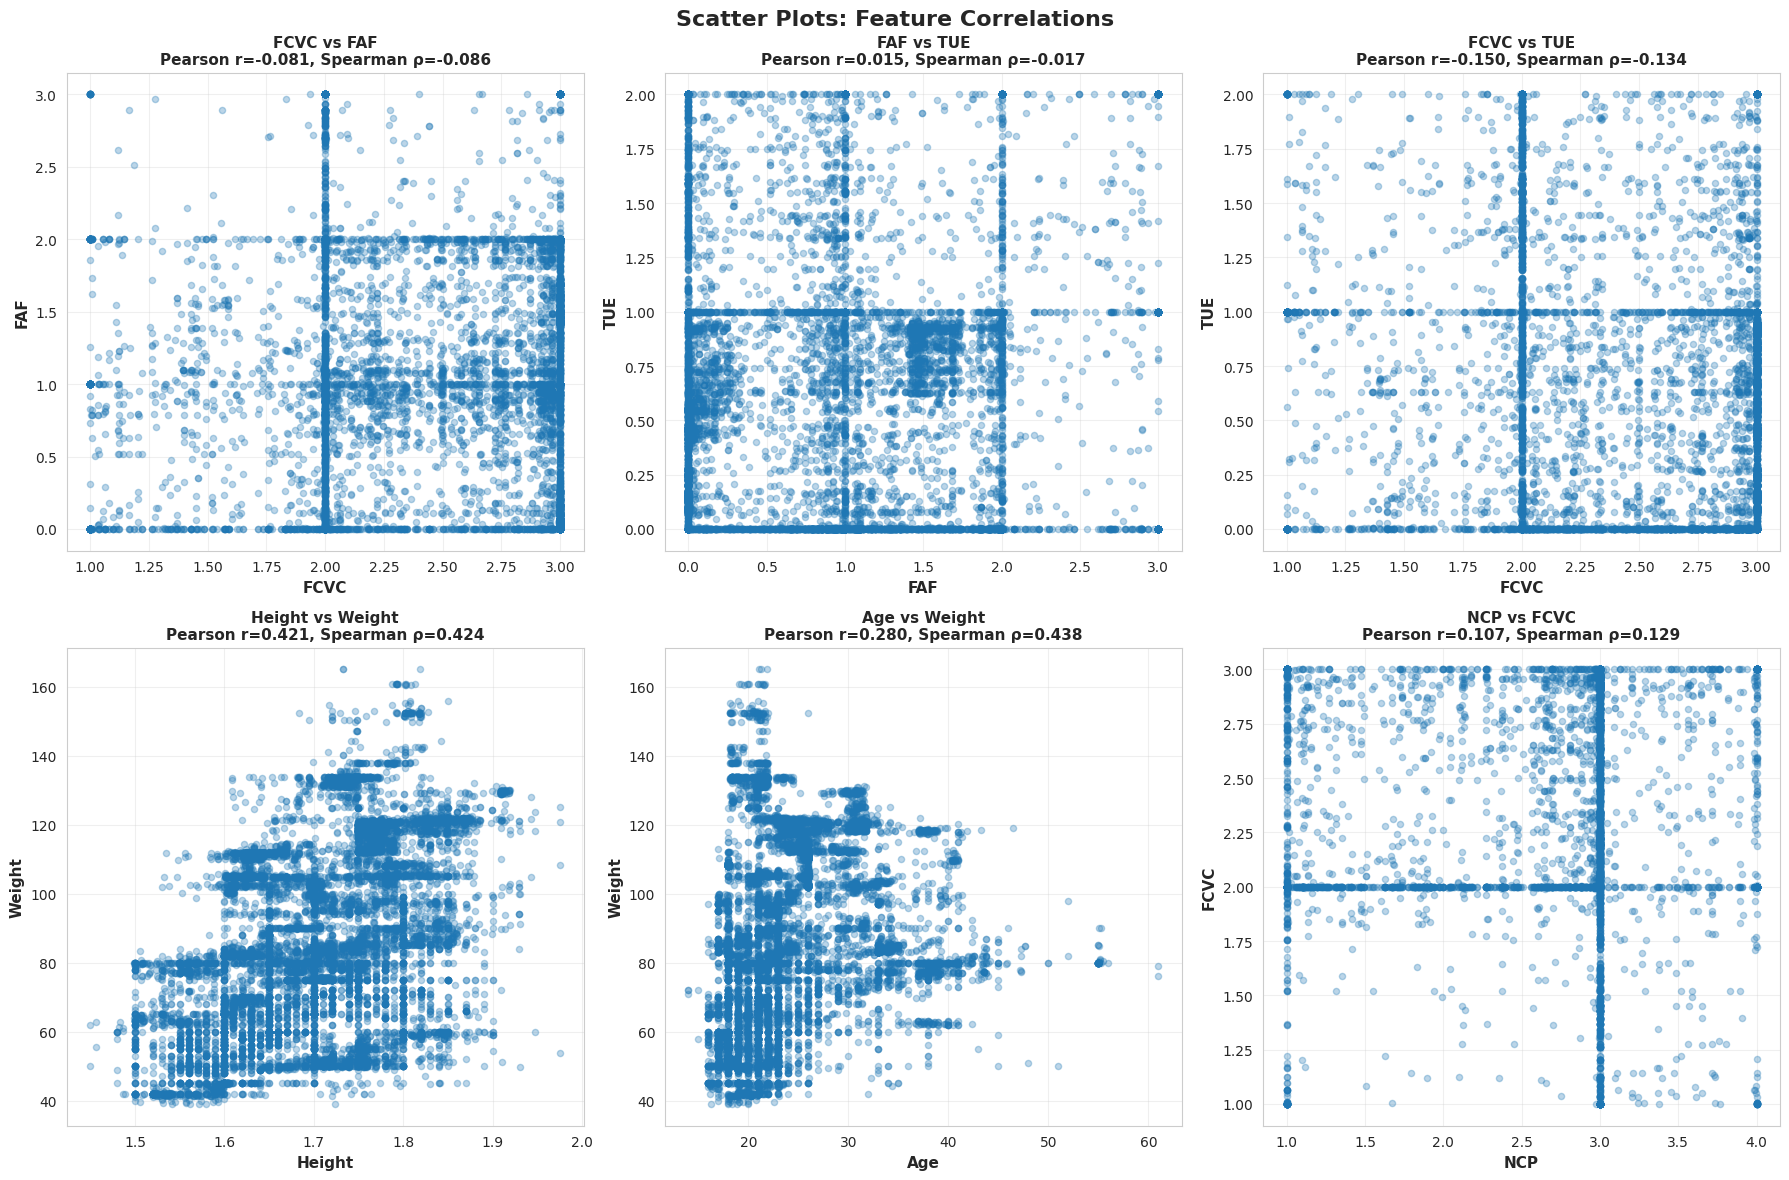

Saved: correlation_scatterplots.png

Results saved: correlation_results.csv
Strong correlations saved: strong_correlations.csv


In [34]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt
import seaborn as sns

print("="*80)
print("CORRELATION ANALYSIS: PEARSON AND SPEARMAN")
print("="*80)

numerical_features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

feature_pairs = [
    ('FCVC', 'FAF'),
    ('FAF', 'TUE'),
    ('FCVC', 'TUE'),
    ('Height', 'Weight'),
    ('Age', 'Weight'),
    ('NCP', 'FCVC')
]

correlation_results = []

print("\n" + "="*80)
print("CORRELATION ANALYSIS FOR FEATURE PAIRS")
print("="*80)

for feat1, feat2 in feature_pairs:
    data1 = train[feat1].dropna()
    data2 = train[feat2].dropna()

    common_idx = data1.index.intersection(data2.index)
    data1 = train.loc[common_idx, feat1]
    data2 = train.loc[common_idx, feat2]

    pearson_r, pearson_p = pearsonr(data1, data2)

    spearman_rho, spearman_p = spearmanr(data1, data2)

    correlation_results.append({
        'Feature_Pair': f'{feat1}-{feat2}',
        'Pearson_r': pearson_r,
        'Pearson_p': pearson_p,
        'Spearman_rho': spearman_rho,
        'Spearman_p': spearman_p
    })

    print(f"\n{feat1} <-> {feat2}:")
    print(f"  Pearson r: {pearson_r:.4f}, p-value: {pearson_p:.4e}")
    print(f"  Spearman ρ: {spearman_rho:.4f}, p-value: {spearman_p:.4e}")

results_df = pd.DataFrame(correlation_results)

print("\n" + "="*80)
print("FULL CORRELATION MATRICES")
print("="*80)

pearson_matrix = train[numerical_features].corr(method='pearson')
print("\nPearson Correlation Matrix:")
print(pearson_matrix.round(3))

spearman_matrix = train[numerical_features].corr(method='spearman')
print("\nSpearman Correlation Matrix:")
print(spearman_matrix.round(3))

print("\n" + "="*80)
print("SIGNIFICANT CORRELATIONS")
print("="*80)

strong_correlations = []
for i in range(len(numerical_features)):
    for j in range(i+1, len(numerical_features)):
        feat1 = numerical_features[i]
        feat2 = numerical_features[j]

        pearson_r = pearson_matrix.iloc[i, j]
        spearman_rho = spearman_matrix.iloc[i, j]

        if abs(pearson_r) > 0.3 or abs(spearman_rho) > 0.3:
            data1 = train[feat1].dropna()
            data2 = train[feat2].dropna()
            common_idx = data1.index.intersection(data2.index)
            data1 = train.loc[common_idx, feat1]
            data2 = train.loc[common_idx, feat2]

            _, pearson_p = pearsonr(data1, data2)
            _, spearman_p = spearmanr(data1, data2)

            strong_correlations.append({
                'Feature_Pair': f'{feat1}-{feat2}',
                'Pearson_r': pearson_r,
                'Pearson_p': pearson_p,
                'Spearman_rho': spearman_rho,
                'Spearman_p': spearman_p
            })

strong_corr_df = pd.DataFrame(strong_correlations)

if len(strong_corr_df) > 0:
    print("\nStrong Correlations (|r| or |ρ| > 0.3):")
    print(strong_corr_df.to_string(index=False))
else:
    print("\nNo strong correlations detected (all |r| and |ρ| ≤ 0.3)")

print("\n" + "="*80)
print("CREATING VISUALIZATIONS")
print("="*80)

fig, axes = plt.subplots(1, 2, figsize=(18, 7))

sns.heatmap(pearson_matrix, annot=True, fmt='.2f', cmap='coolwarm',
           center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8},
           ax=axes[0], vmin=-1, vmax=1)
axes[0].set_title('Pearson Correlation Matrix', fontsize=14, fontweight='bold')

sns.heatmap(spearman_matrix, annot=True, fmt='.2f', cmap='coolwarm',
           center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8},
           ax=axes[1], vmin=-1, vmax=1)
axes[1].set_title('Spearman Correlation Matrix', fontsize=14, fontweight='bold')

plt.suptitle('Correlation Matrices: Pearson vs Spearman',
            fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('correlation_matrices.png', dpi=300, bbox_inches='tight')
plt.show()

print("Saved: correlation_matrices.png")

print("\nCreating scatter plots for key correlations...")

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for idx, (feat1, feat2) in enumerate(feature_pairs):
    ax = axes[idx]

    corr_row = results_df[results_df['Feature_Pair'] == f'{feat1}-{feat2}']
    if len(corr_row) > 0:
        pearson_r = corr_row.iloc[0]['Pearson_r']
        spearman_rho = corr_row.iloc[0]['Spearman_rho']
    else:
        pearson_r = pearson_matrix.loc[feat1, feat2]
        spearman_rho = spearman_matrix.loc[feat1, feat2]

    ax.scatter(train[feat1], train[feat2], alpha=0.3, s=20)
    ax.set_xlabel(feat1, fontsize=11, fontweight='bold')
    ax.set_ylabel(feat2, fontsize=11, fontweight='bold')
    ax.set_title(f'{feat1} vs {feat2}\nPearson r={pearson_r:.3f}, Spearman ρ={spearman_rho:.3f}',
                fontsize=11, fontweight='bold')
    ax.grid(alpha=0.3)

if len(feature_pairs) < len(axes):
    for idx in range(len(feature_pairs), len(axes)):
        fig.delaxes(axes[idx])

plt.suptitle('Scatter Plots: Feature Correlations', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('correlation_scatterplots.png', dpi=300, bbox_inches='tight')
plt.show()

print("Saved: correlation_scatterplots.png")

results_df.to_csv('correlation_results.csv', index=False)
print("\nResults saved: correlation_results.csv")

if len(strong_corr_df) > 0:
    strong_corr_df.to_csv('strong_correlations.csv', index=False)
    print("Strong correlations saved: strong_correlations.csv")